In [1]:
import pandas as pd

# List of data file paths
data_files = ['Dose_radium3.txt', 'Dose_radium31.txt', 'Dose_radium32.txt', 'Dose_radium33.txt', 'Dose_radium34.txt',
              'Dose_radium35.txt','Dose_radium36.txt','Dose_radium37.txt', 'Dose_radium39.txt',
             'Dose_radium310.txt', 'Dose_radium311.txt','Dose_radium312.txt','Dose_radium313.txt','Dose_radium314.txt']

# Create a new DataFrame to store the 'dose[Gy]' column from each file
df2 = pd.DataFrame()

# Iterate over the data files
for file in data_files:
    # Read the dose file into a list of strings
    with open(file, 'r') as f:
        data = f.readlines()
    
    # Remove comments and empty lines
    lines = [line.strip().split('#')[0] for line in data if line.strip() and not line.startswith('#')]
    
    # Split the lines into fields and create a DataFrame
    df = pd.DataFrame([line.split(',') for line in lines], columns=['iX', 'iY', 'iZ', 'dose[Gy]', 'dose^2)', 'entry'])
    
    # Convert columns to numeric type
    df = df.apply(pd.to_numeric)
    
    # Add the 'dose[Gy]' column to df2
    df2 = pd.concat([df2, df['dose[Gy]']], axis=1)

# Calculate the mean of each row and add it as a new column 'mean'
df2['mean'] = df2.mean(axis=1)

# Print the new DataFrame with the 'dose[Gy]' columns and 'mean' column
print(df2)


      dose[Gy]  dose[Gy]  dose[Gy]  dose[Gy]  dose[Gy]  dose[Gy]  dose[Gy]  \
0     0.000788  0.000788  0.000788  0.000788  0.000788  0.000788  0.000788   
1     0.000928  0.000928  0.000928  0.000928  0.000928  0.000928  0.000928   
2     0.001085  0.001085  0.001085  0.001085  0.001085  0.001085  0.001085   
3     0.001198  0.001198  0.001198  0.001198  0.001198  0.001198  0.001198   
4     0.001219  0.001219  0.001219  0.001219  0.001219  0.001219  0.001219   
...        ...       ...       ...       ...       ...       ...       ...   
1326  0.001252  0.001252  0.001252  0.001252  0.001252  0.001252  0.001252   
1327  0.001133  0.001133  0.001132  0.001133  0.001133  0.001133  0.001133   
1328  0.001051  0.001051  0.001051  0.001051  0.001051  0.001051  0.001051   
1329  0.000901  0.000901  0.000901  0.000901  0.000901  0.000901  0.000901   
1330  0.000741  0.000741  0.000741  0.000741  0.000741  0.000741  0.000741   

      dose[Gy]  dose[Gy]  dose[Gy]  dose[Gy]  dose[Gy]  dose[Gy

In [6]:
import pandas as pd

# List of data file paths
data_files = ['Dose_radium3.txt', 'Dose_radium31.txt', 'Dose_radium32.txt', 'Dose_radium33.txt', 'Dose_radium34.txt',
              'Dose_radium35.txt','Dose_radium36.txt','Dose_radium37.txt', 'Dose_radium39.txt',
             'Dose_radium310.txt', 'Dose_radium311.txt','Dose_radium312.txt','Dose_radium313.txt','Dose_radium314.txt']

# Create a new DataFrame to store the 'dose[Gy]' column from each file
df2 = pd.DataFrame()

# Iterate over the data files
for file in data_files:
    # Read the dose file into a list of strings
    with open(file, 'r') as f:
        data = f.readlines()
    
    # Remove comments and empty lines
    lines = [line.strip().split('#')[0] for line in data if line.strip() and not line.startswith('#')]
    
    # Split the lines into fields and create a DataFrame
    df = pd.DataFrame([line.split(',') for line in lines], columns=['iX', 'iY', 'iZ', 'dose[Gy]', 'dose^2)', 'entry'])
    
    # Convert columns to numeric type
    df = df.apply(pd.to_numeric)
    
    # Add the 'dose[Gy]' column to df2
    df2 = pd.concat([df2, df['dose[Gy]']], axis=1)

# Calculate the mean of each row and add it as a new column 'mean'
df2['mean'] = df2.mean(axis=1)

# Calculate the standard deviation of each row and add it as a new column 'std_dev'
df2['std_dev'] = df2.std(axis=1)

# Calculate the uncertainty of each row and add it as a new column 'uncertainty'
df2['uncertainty'] = df2['std_dev'] / df2.shape[1] ** 0.5

# Print the new DataFrame with the 'dose[Gy]' columns, 'mean', 'std_dev', and 'uncertainty' columns
# print(df2)
# Calculate the mean of the 'uncertainty' column
mean_uncertainty = df2['uncertainty'].mean()

# Print the mean of the 'uncertainty' column
print("Mean of uncertainty column:", mean_uncertainty)
mean_std_dev = df2['std_dev'].mean()
print("Mean of standard deviation:", mean_std_dev)
mean_mean = df2['mean'].mean()
print("Mean of the mean of each row :", mean_mean)
df2.to_csv('Kenko_simula.csv', index= False)


Mean of uncertainty column: 4.785416603259904e-07
Mean of standard deviation: 1.9141666413039614e-06
Mean of the mean of each row : 2.042781422401467


Mean of the mean of each row : 2.0427814224014664


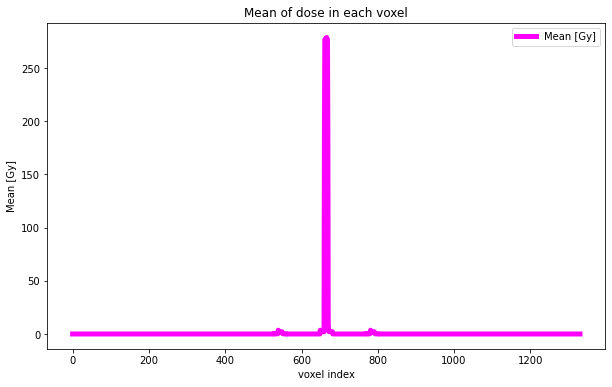

Mean of standard deviation: 1.914166641303541e-06


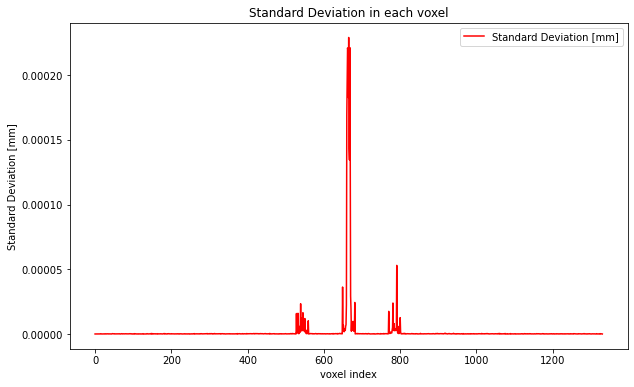

Mean of uncertainty column: 4.785416603259904e-07


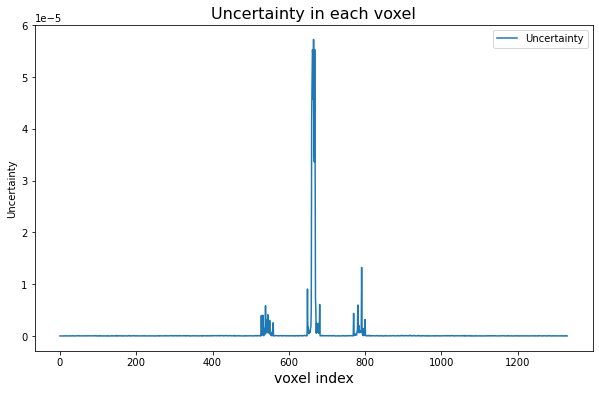

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the DataFrame from the CSV file
df2 = pd.read_csv('Kenko_simula.csv')

# Plot the means
plt.figure(figsize=(10, 6))
plt.plot(df2['mean'], label='Mean [Gy]', color= 'magenta', lw= '5')
plt.xlabel('voxel index')
plt.ylabel('Mean [Gy]')
plt.title('Mean of dose in each voxel')
mean_mean = df2['mean'].mean()
print("Mean of the mean of each row :", mean_mean)
plt.legend()
plt.savefig('mean_dose.png',facecolor= 'white')
plt.show()

# Plot the standard deviations
plt.figure(figsize=(10, 6))
plt.plot(df2['std_dev'], label='Standard Deviation [mm]', color= 'red')
plt.xlabel('voxel index')
plt.ylabel('Standard Deviation [mm]')
plt.title('Standard Deviation in each voxel')
mean_std_dev = df2['std_dev'].mean()
print("Mean of standard deviation:", mean_std_dev)
plt.legend()
plt.savefig('standard deviation.png', facecolor= 'white')
plt.show()

# Plot the uncertainties
plt.figure(figsize=(10, 6))
plt.plot(df2['uncertainty'], label='Uncertainty')
plt.xlabel('voxel index', fontsize = 14)
plt.ylabel('Uncertainty')
plt.title('Uncertainty in each voxel', fontsize = 16)
mean_uncertainty = df2['uncertainty'].mean()

# Print the mean of the 'uncertainty' column
print("Mean of uncertainty column:", mean_uncertainty)
plt.legend()
plt.savefig('Uncertainty.png', facecolor= 'white')
plt.show()


Mean of the mean of each row: 2.0427814224014664
Minimum of the mean of each row: 0.0007408762514919
Maximum of the mean of each row: 278.7135111349599


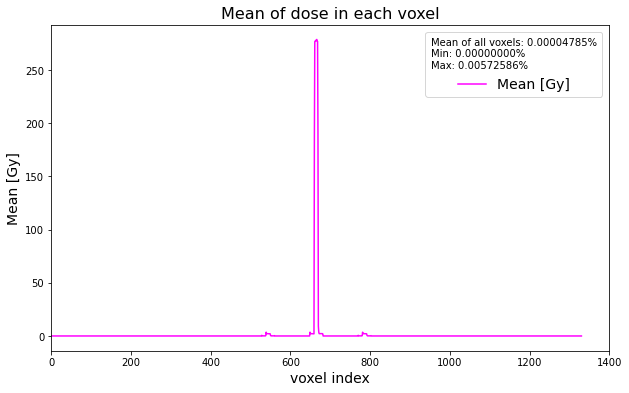

Mean of standard deviation: 1.914166641303541e-06
Minimum of standard deviation: 0.0
Maximum of standard deviation: 0.0002290343478088


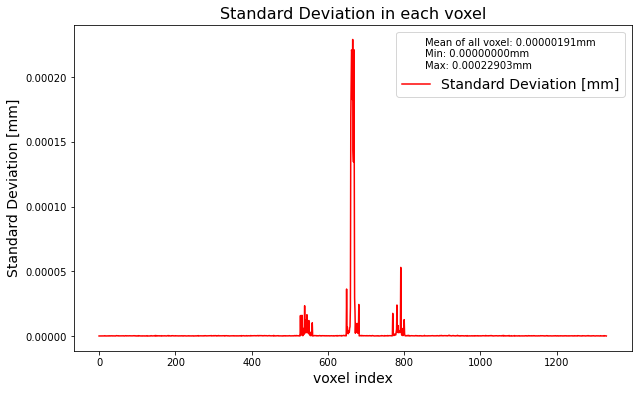

Mean of uncertainty column: 4.785416603259904e-07
Minimum of uncertainty column: 0.0
Maximum of uncertainty column: 5.7258586952209146e-05


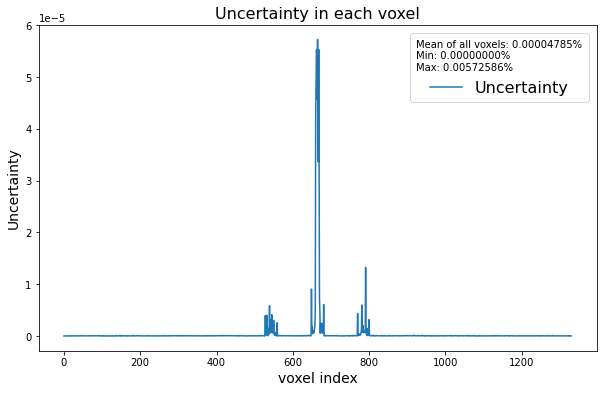

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the DataFrame from the CSV file
df2 = pd.read_csv('Kenko_simula.csv')

# Plot the means
plt.figure(figsize=(10, 6))
plt.plot(df2['mean'], label='Mean [Gy]', color='magenta')
plt.xlabel('voxel index', fontsize = 14)
plt.ylabel('Mean [Gy]', fontsize = 14)
plt.title('Mean of dose in each voxel', fontsize = 16)
mean_mean = df2['mean'].mean()
min_mean = df2['mean'].min()
max_mean = df2['mean'].max()
print("Mean of the mean of each row:", mean_mean)
print("Minimum of the mean of each row:", min_mean)
print("Maximum of the mean of each row:", max_mean)
plt.legend(title=f"Mean of all voxels: {mean_uncertainty*100:.8f}%\nMin: {min_uncertainty*100:.8f}%\nMax: {max_uncertainty*100:.8f}%", fontsize=14)
plt.xlim([0,1400])
plt.savefig('mean_dose.png', facecolor='white')
plt.show()

# Plot the standard deviations
plt.figure(figsize=(10, 6))
plt.plot(df2['std_dev'], label='Standard Deviation [mm]', color='red')
plt.xlabel('voxel index', fontsize = 14)
plt.ylabel('Standard Deviation [mm]', fontsize = 14)
plt.title('Standard Deviation in each voxel', fontsize = 16)
mean_std_dev = df2['std_dev'].mean()
min_std_dev = df2['std_dev'].min()
max_std_dev = df2['std_dev'].max()
print("Mean of standard deviation:", mean_std_dev)
print("Minimum of standard deviation:", min_std_dev)
print("Maximum of standard deviation:", max_std_dev)
plt.legend(title=f"Mean of all voxel: {mean_std_dev:.8f}mm\nMin: {min_std_dev:.8f}mm\nMax: {max_std_dev:.8f}mm", fontsize=14)
plt.savefig('standard_deviation.png', facecolor='white')
plt.show()

# Plot the uncertainties
plt.figure(figsize=(10, 6))
plt.plot(df2['uncertainty'], label='Uncertainty')
plt.xlabel('voxel index', fontsize = 14)
plt.ylabel('Uncertainty', fontsize = 14)
plt.title('Uncertainty in each voxel', fontsize = 16)
mean_uncertainty = df2['uncertainty'].mean()
min_uncertainty = df2['uncertainty'].min()
max_uncertainty = df2['uncertainty'].max()
print("Mean of uncertainty column:", mean_uncertainty)
print("Minimum of uncertainty column:", min_uncertainty)
print("Maximum of uncertainty column:", max_uncertainty)
plt.legend(title=f"Mean of all voxels: {mean_uncertainty*100:.8f}%\nMin: {min_uncertainty*100:.8f}%\nMax: {max_uncertainty*100:.8f}%", fontsize=16)
plt.savefig('uncertainty.png', facecolor='white')
plt.show()


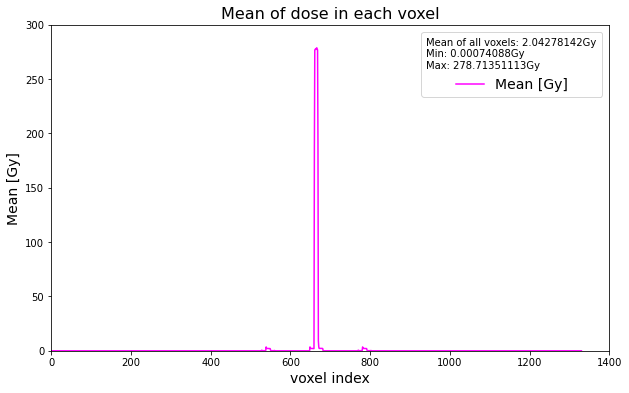

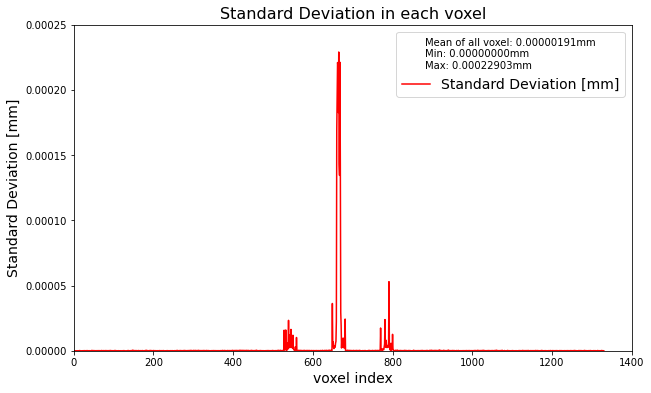

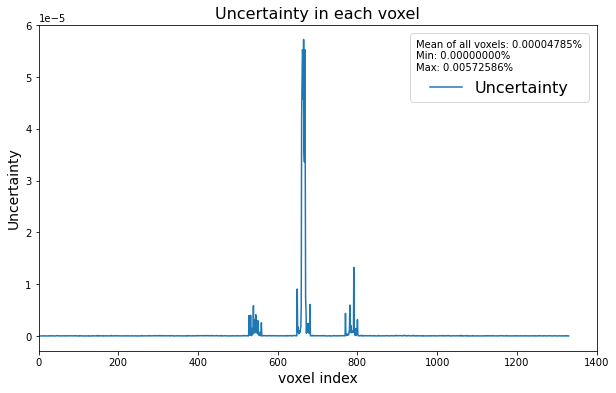

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the DataFrame from the CSV file
df2 = pd.read_csv('Kenko_simula.csv')

# Plot the means
plt.figure(figsize=(10, 6))
plt.plot(df2['mean'], label='Mean [Gy]', color='magenta')
plt.xlabel('voxel index', fontsize=14)
plt.ylabel('Mean [Gy]', fontsize=14)
plt.title('Mean of dose in each voxel', fontsize=16)
mean_mean = df2['mean'].mean()
min_mean = df2['mean'].min()
max_mean = df2['mean'].max()
plt.legend(title=f"Mean of all voxels: {mean_mean:.8f}Gy\nMin: {min_mean:.8f}Gy\nMax: {max_mean:.8f}Gy", fontsize=14)
plt.xlim([0,1400])
plt.ylim([0,300])
plt.savefig('mean_dose.png', facecolor='white')
plt.show()

# Plot the standard deviations
plt.figure(figsize=(10, 6))
plt.plot(df2['std_dev'], label='Standard Deviation [mm]', color='red')
plt.xlabel('voxel index', fontsize=14)
plt.ylabel('Standard Deviation [mm]', fontsize=14)
plt.title('Standard Deviation in each voxel', fontsize=16)
mean_std_dev = df2['std_dev'].mean()
min_std_dev = df2['std_dev'].min()
max_std_dev = df2['std_dev'].max()
plt.legend(title=f"Mean of all voxel: {mean_std_dev:.8f}mm\nMin: {min_std_dev:.8f}mm\nMax: {max_std_dev:.8f}mm", fontsize=14)
plt.xlim([0,1400])
plt.ylim([0,0.00025])
plt.savefig('standard_deviation.png', facecolor='white')
plt.show()

# Plot the uncertainties
plt.figure(figsize=(10, 6))
plt.plot(df2['uncertainty'], label='Uncertainty')
plt.xlabel('voxel index', fontsize=14)
plt.ylabel('Uncertainty', fontsize=14)
plt.title('Uncertainty in each voxel', fontsize=16)
mean_uncertainty = df2['uncertainty'].mean()
min_uncertainty = df2['uncertainty'].min()
max_uncertainty = df2['uncertainty'].max()
plt.legend(title=f"Mean of all voxels: {mean_uncertainty*100:.8f}%\nMin: {min_uncertainty*100:.8f}%\nMax: {max_uncertainty*100:.8f}%", fontsize=16)
plt.xlim([0,1400])
plt.savefig('uncertainty.png', facecolor='white')
plt.show()


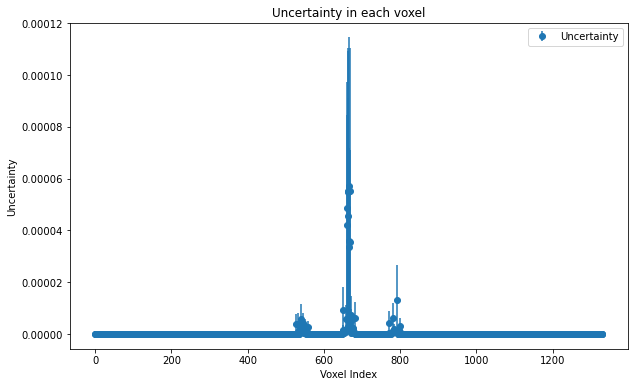

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the DataFrame from the CSV file
df2 = pd.read_csv('Kenko_simula.csv')

# Plot the uncertainties with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df2.index, 
    y=df2['uncertainty'], 
    yerr=df2['uncertainty'], 
    fmt='o', 
    label='Uncertainty'
)

plt.xlabel('Voxel Index')
plt.ylabel('Uncertainty')
plt.title('Uncertainty in each voxel')

mean_uncertainty = df2['uncertainty'].mean()
min_uncertainty = df2['uncertainty'].min()
max_uncertainty = df2['uncertainty'].max()

plt.legend()
plt.show()


Dose for Y = 0: 0.0132541336982536 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 1: 0.017901498066617203 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 2: 0.0245828272598594 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 3: 0.0343071606316838 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 4: 4.804023348138136 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 5: 192.9022903827212 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 6: 4.80830991406904 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 7: 0.0344634654428047 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 8: 0.0245017676414239 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 9: 0.0180217494742851 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Dose for Y = 10: 0.013247140679367199 Gy (X values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
Total Dose: 202.6949033878227 Gy


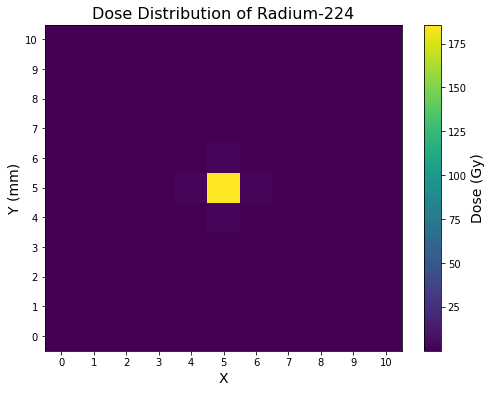

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium31.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iX', aggfunc='first').values

# Create a meshgrid for the Y and X coordinates
y, x = np.meshgrid(df['iY'].unique(), df['iX'].unique(), indexing='ij')

# Plot the dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X', fontsize=14)  # Set the X-axis label
ax.set_ylabel('Y (mm)', fontsize=14)  # Set the Y-axis label
ax.set_title('Dose Distribution of Radium-224', fontsize=16)

im = ax.pcolormesh(x, y, dose_array, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Dose (Gy)', fontsize=14)  # Set the colorbar label

# Set the X-axis labels
x_labels = df['iX'].unique().astype(str)
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels)

# Set the Y-axis labels
y_labels = df['iY'].unique().astype(str)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)

# Calculate the sum of dose at each point
for j in range(len(y_labels)):
    dose_sum = np.nansum(dose_array[j, :])  # Sum of dose for a fixed Y over all values of X
    x_indices = np.where(~np.isnan(dose_array[j, :]))[0]
    x_values = x_labels[x_indices]
    print("Dose for Y = {}: {} Gy (X values: {})".format(y_labels[j], dose_sum, ", ".join(x_values)))

# Calculate the total dose
total_dose = np.nansum(dose_array)

# Print the total dose
print("Total Dose: {} Gy".format(total_dose))

# Save the figure with a white background
plt.savefig('dose_xy_Ra.png', facecolor='white')

# Display the plot
plt.show()


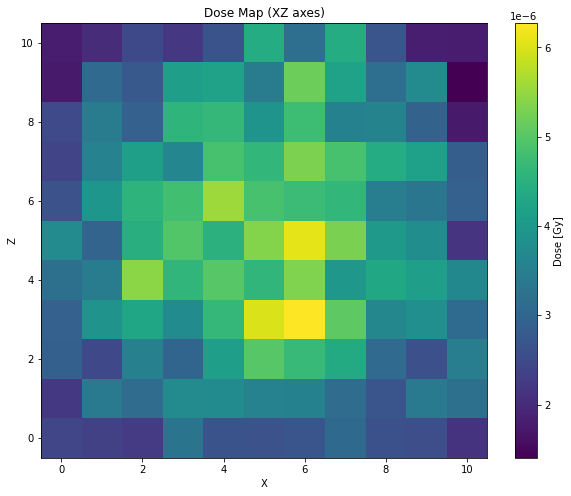

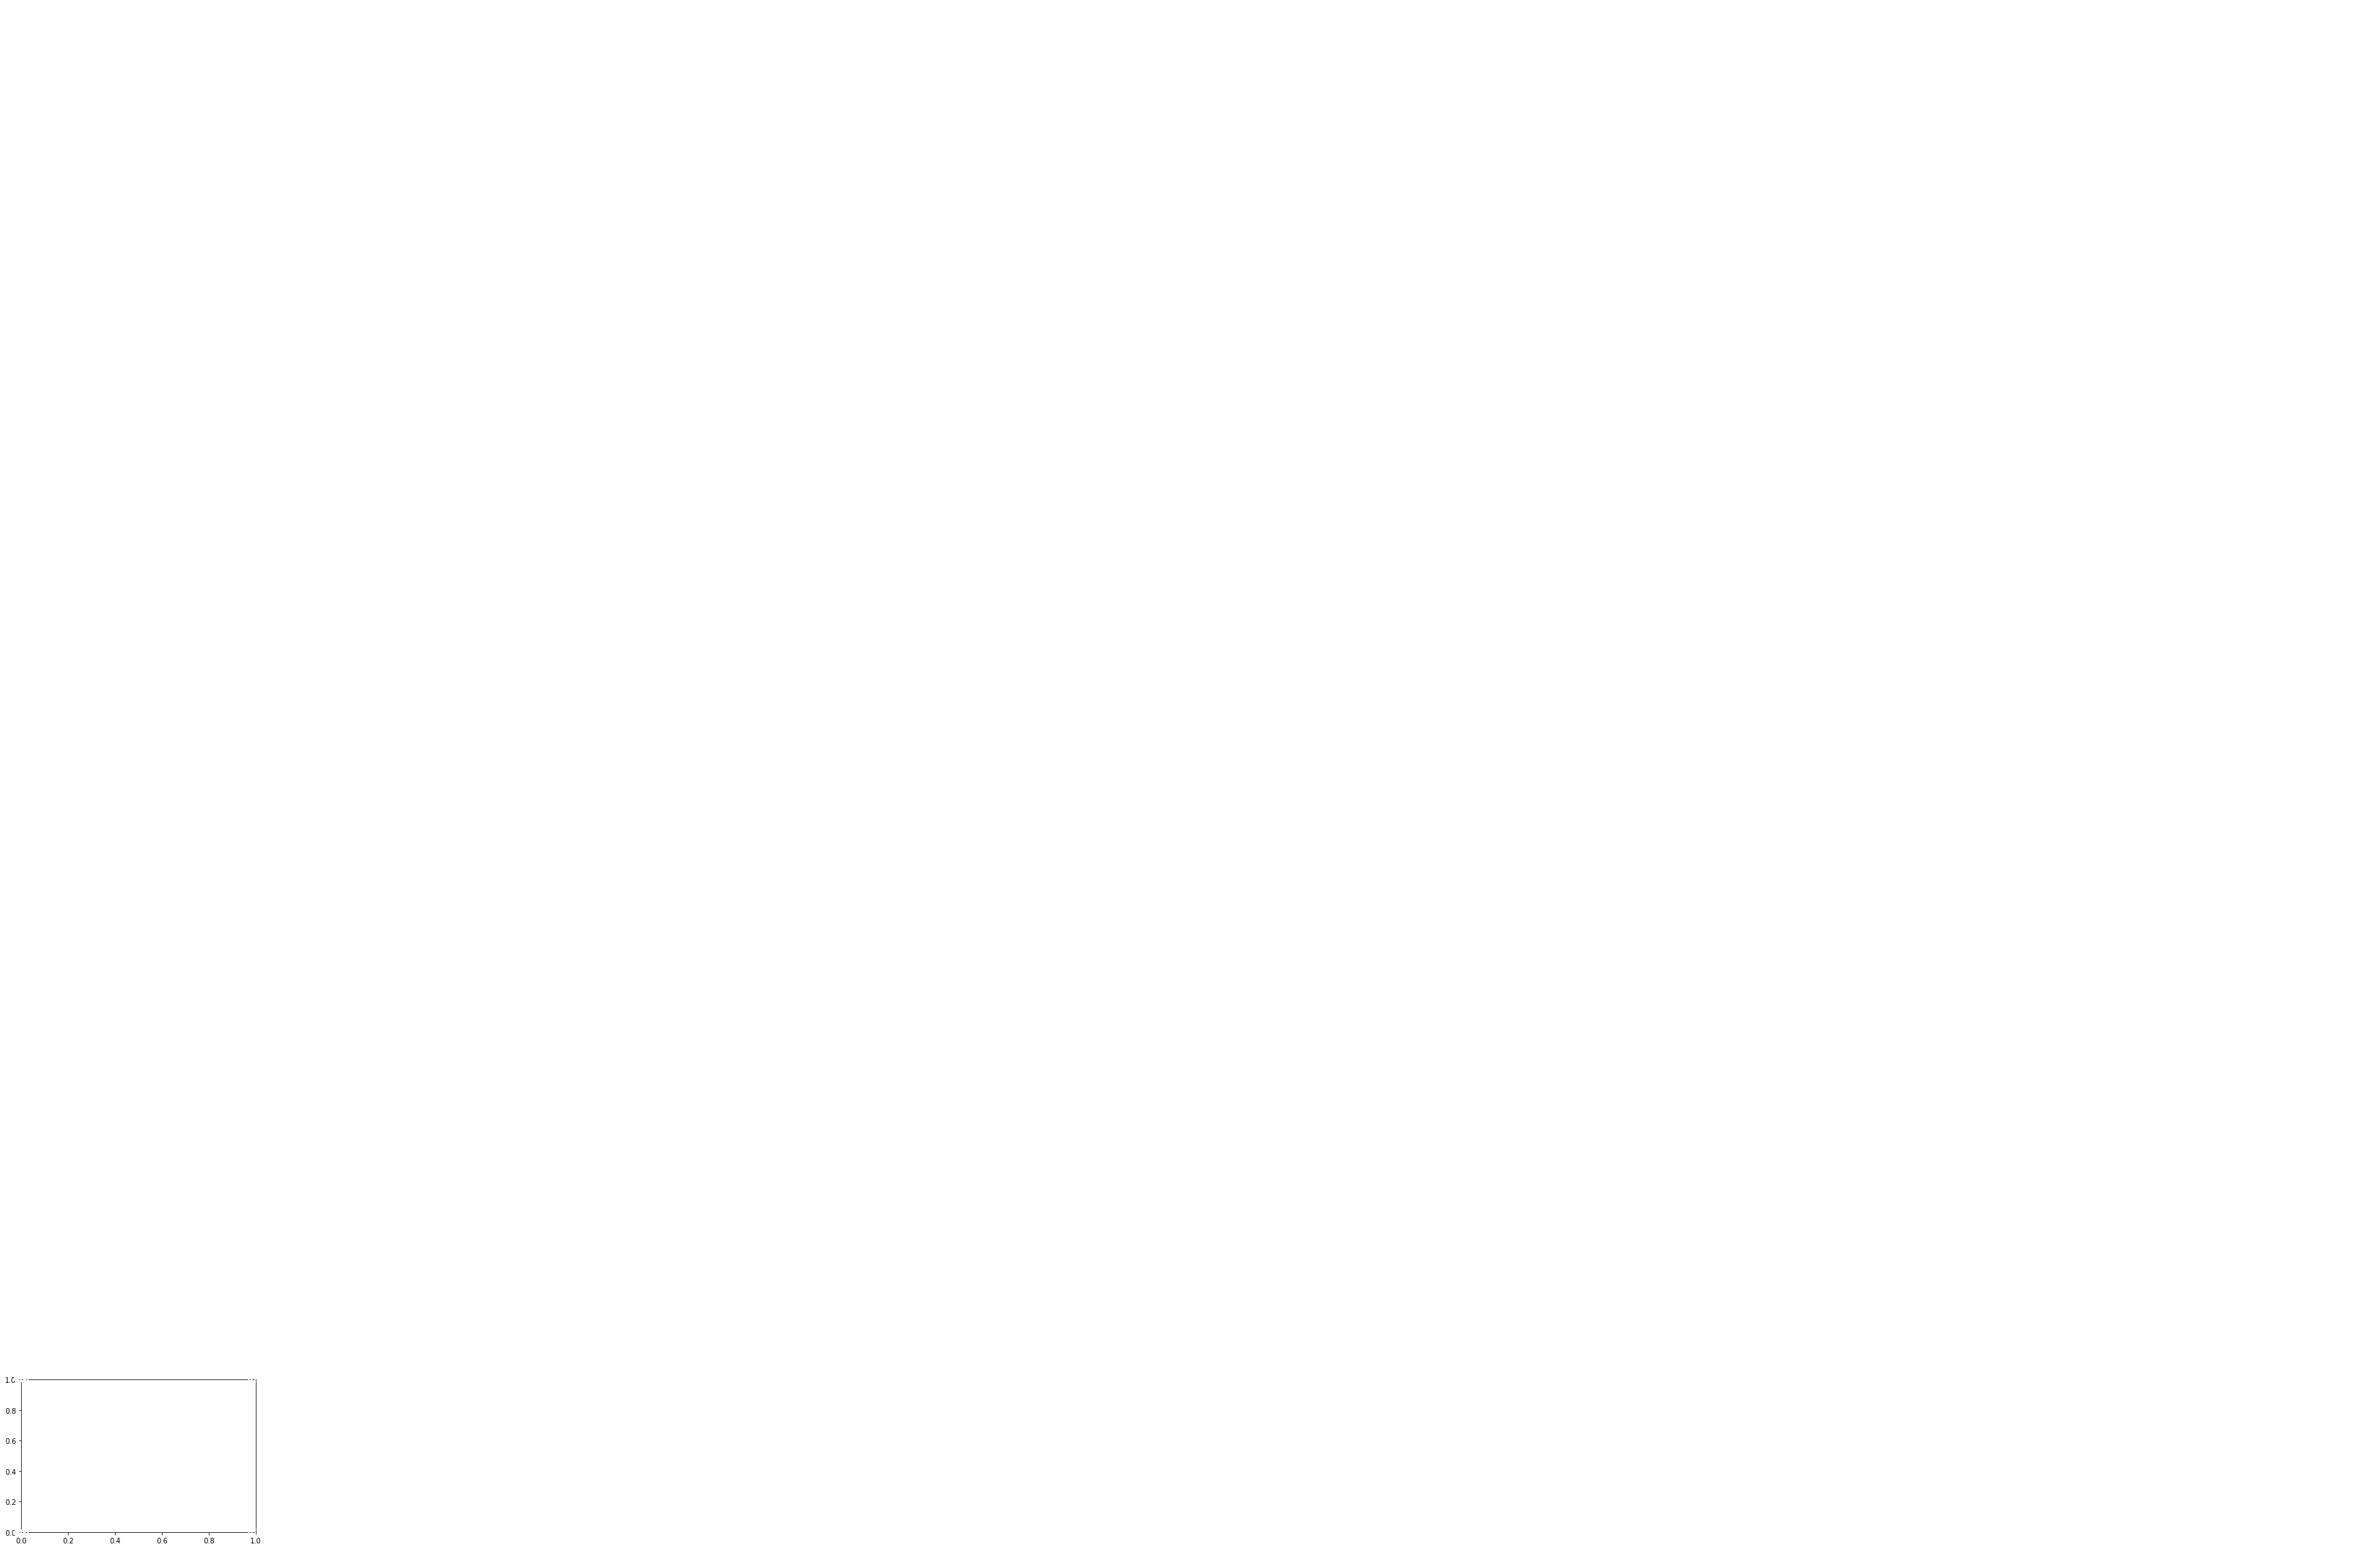

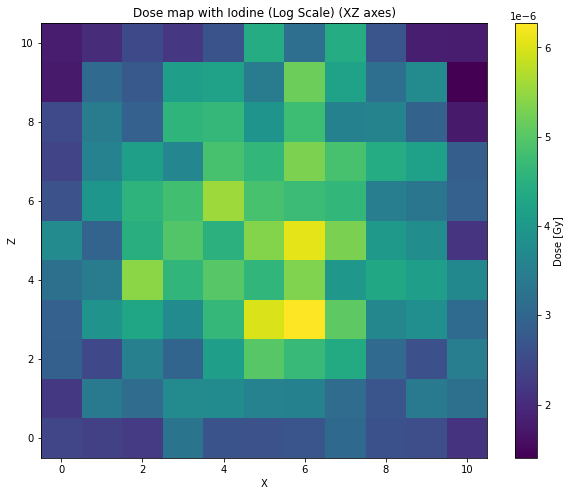

Total Dose Deposited on the X-axis:
X: 0, Total Dose: 0.000
X: 1, Total Dose: 0.001
X: 2, Total Dose: 0.001
X: 3, Total Dose: 0.001
X: 4, Total Dose: 0.049
X: 5, Total Dose: 11.162
X: 6, Total Dose: 0.049
X: 7, Total Dose: 0.001
X: 8, Total Dose: 0.001
X: 9, Total Dose: 0.001
X: 10, Total Dose: 0.000

Total Dose Deposited on the Z-axis:
Z: 0, Total Dose: 0.157
Z: 1, Total Dose: 1.177
Z: 2, Total Dose: 1.225
Z: 3, Total Dose: 1.228
Z: 4, Total Dose: 1.225
Z: 5, Total Dose: 1.230
Z: 6, Total Dose: 1.234
Z: 7, Total Dose: 1.231
Z: 8, Total Dose: 1.224
Z: 9, Total Dose: 1.180
Z: 10, Total Dose: 0.156


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iZ', columns='iX', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iX'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose map on XZ axes
plt.figure(figsize=(10, 8))
plt.pcolormesh(x, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the XZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Dose Map (XZ axes)')
plt.show()

# Show the exact values of the total dose on the map
for i in range(len(df)):
    x_val = df.loc[i, 'iX']
    z_val = df.loc[i, 'iZ']
    dose_val = df.loc[i, 'Dose [Gy]']
    plt.text(x_val, z_val, f'{dose_val:.2f}', ha='center', va='center', color='white')

plt.figure(figsize=(10, 8))
plt.pcolormesh(x, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the XZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Dose map with Iodine (Log Scale) (XZ axes)')
plt.show()

# Compute the total dose deposited at the X and Z axes
total_dose_x_axis = df.groupby('iX')['Dose [Gy]'].sum()
total_dose_z_axis = df.groupby('iZ')['Dose [Gy]'].sum()

x_axis_value = np.unique(df['iX'].values)
z_axis_value = np.unique(df['iZ'].values)

total_dose_x_values = total_dose_x_axis.values
total_dose_z_values = total_dose_z_axis.values

print("Total Dose Deposited on the X-axis:")
for x, dose in zip(x_axis_value, total_dose_x_values):
    print(f"X: {x}, Total Dose: {dose:.3f}")

print("\nTotal Dose Deposited on the Z-axis:")
for z, dose in zip(z_axis_value, total_dose_z_values):
    print(f"Z: {z}, Total Dose: {dose:.3f}")


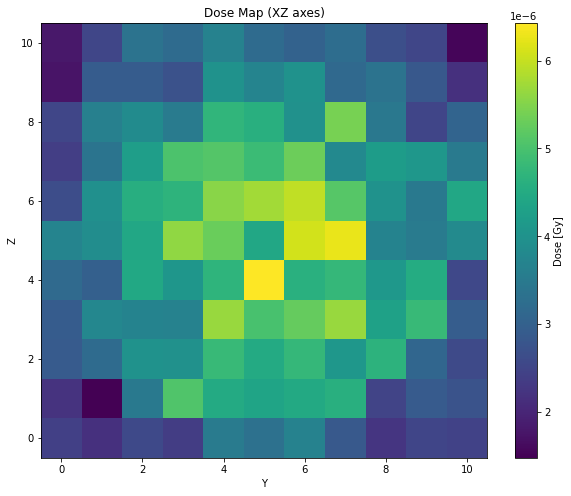

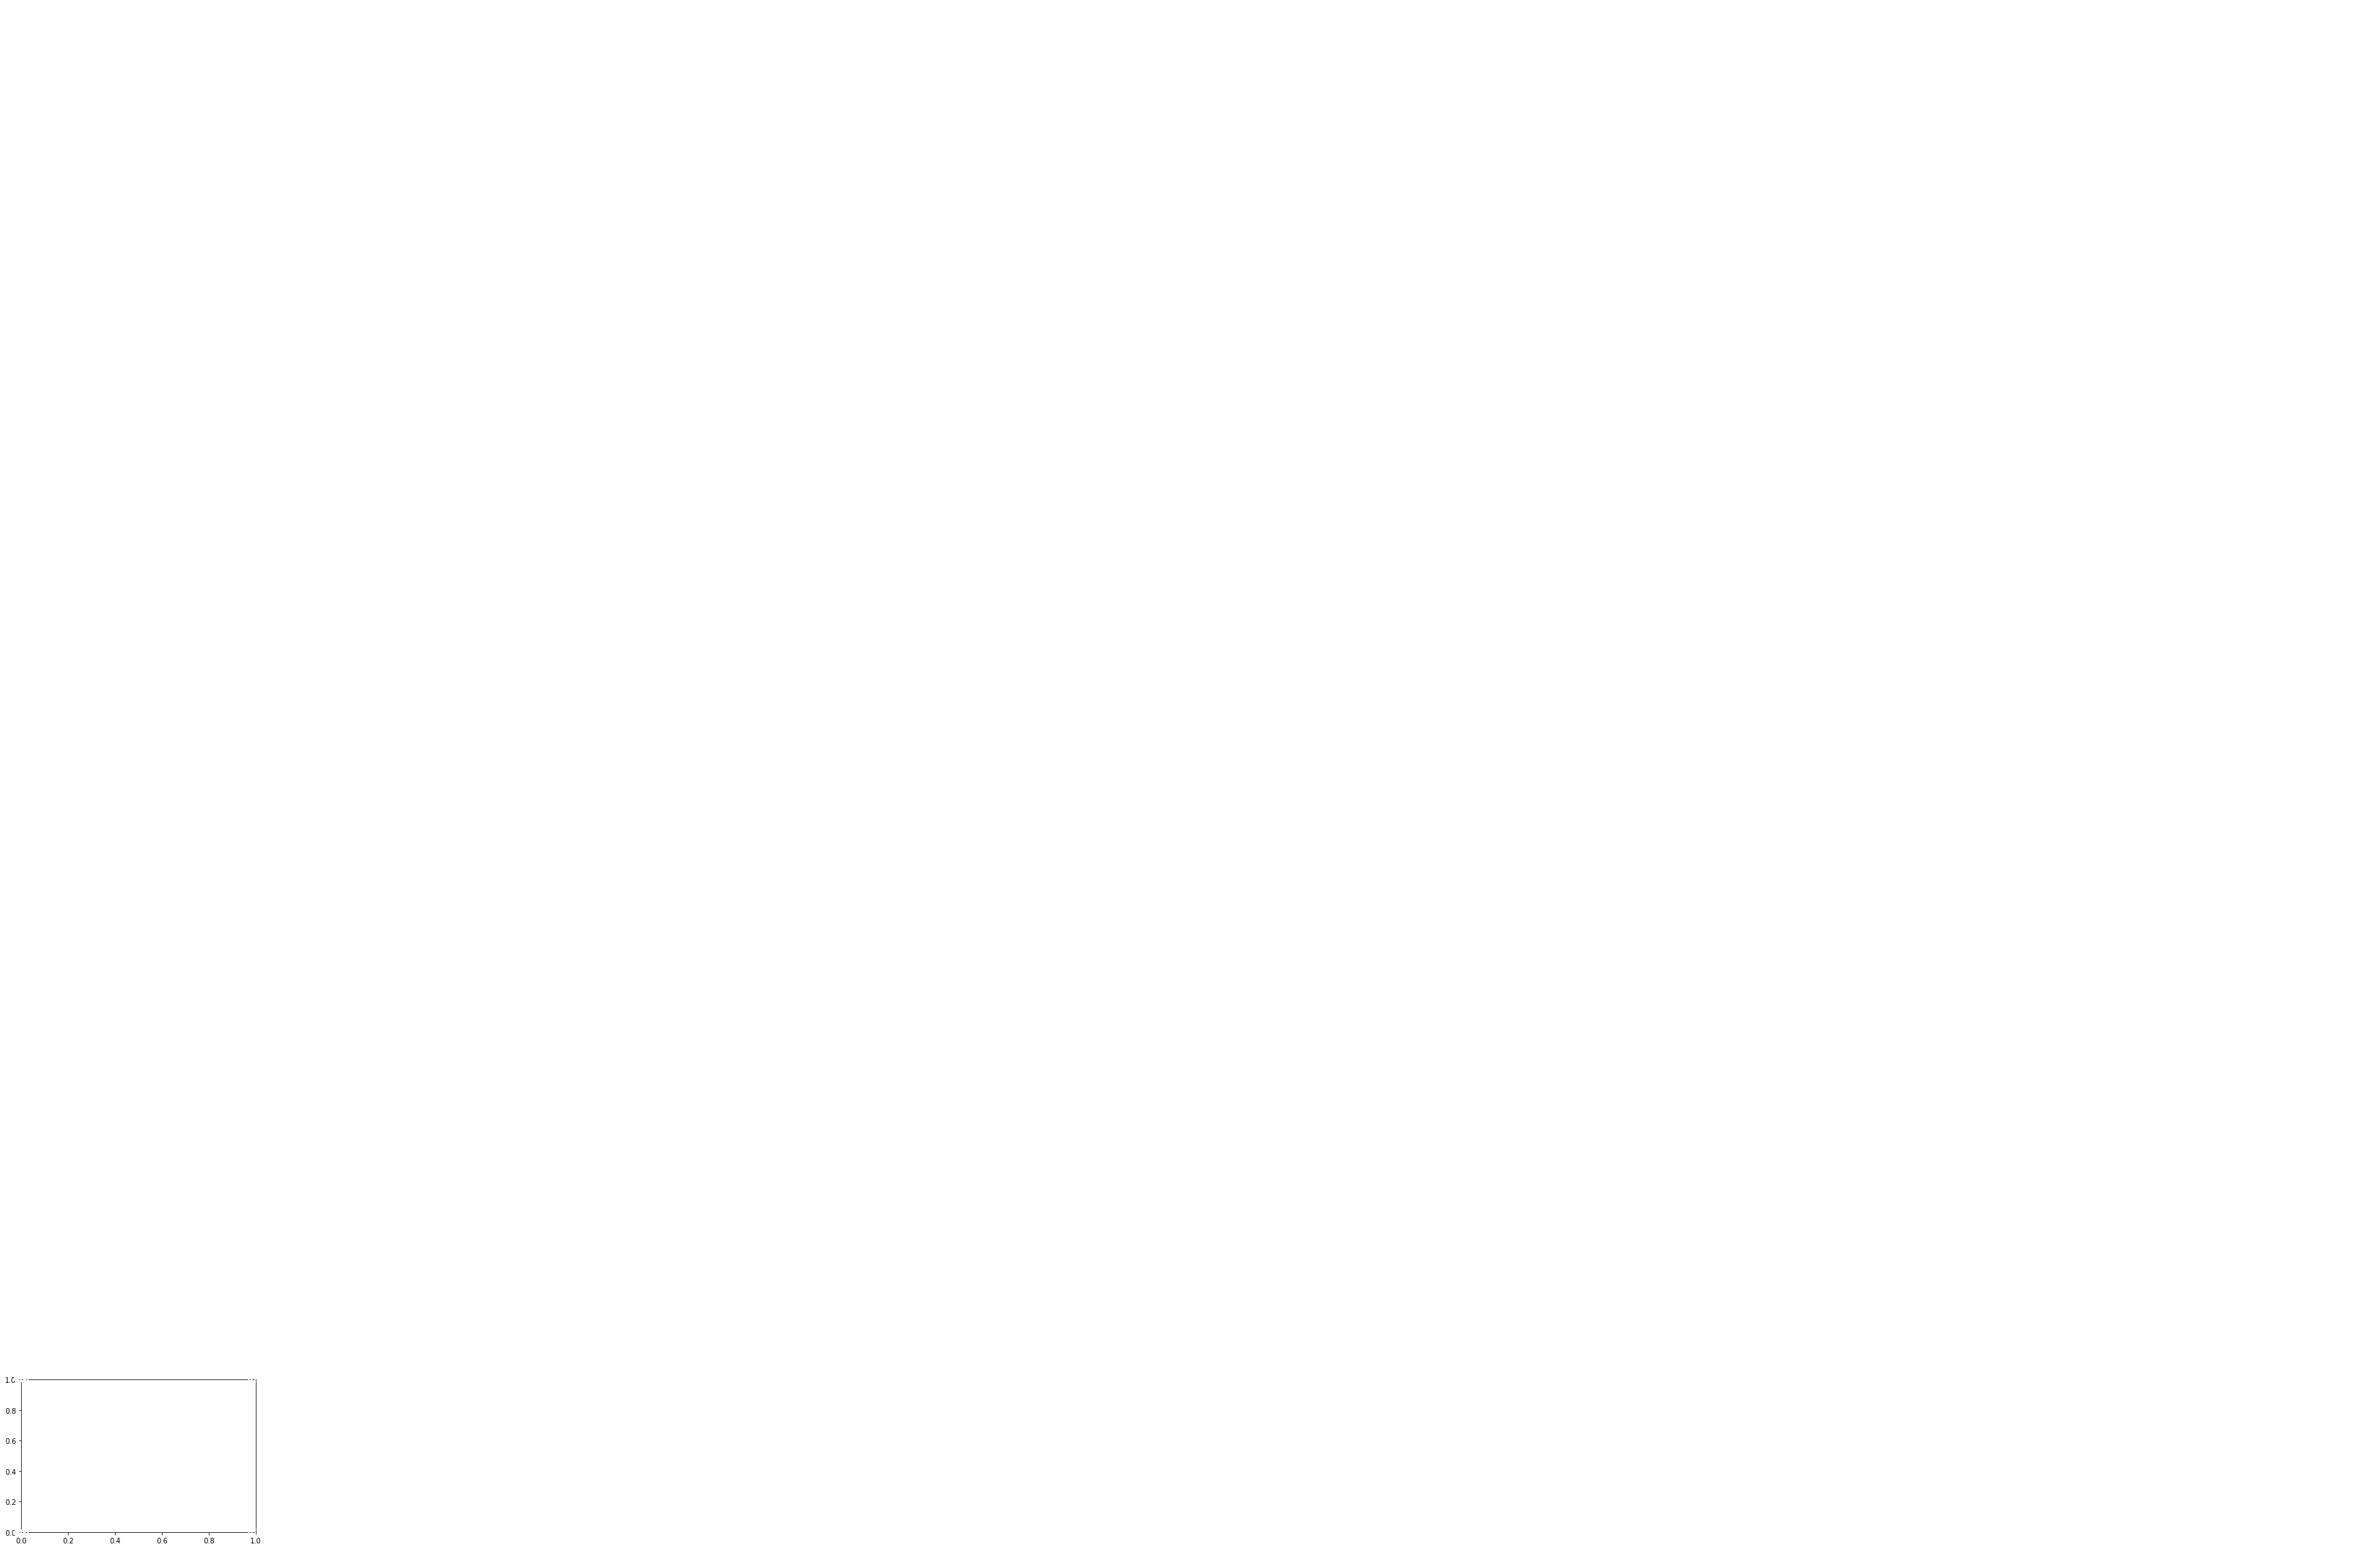

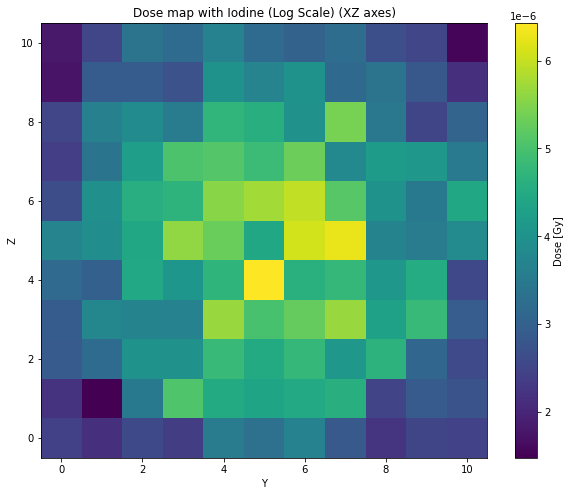

Total Dose Deposited on the X-axis:
Y: 0, Total Dose: 0.000
Y: 1, Total Dose: 0.001
Y: 2, Total Dose: 0.001
Y: 3, Total Dose: 0.001
Y: 4, Total Dose: 0.049
Y: 5, Total Dose: 11.162
Y: 6, Total Dose: 0.049
Y: 7, Total Dose: 0.001
Y: 8, Total Dose: 0.001
Y: 9, Total Dose: 0.001
Y: 10, Total Dose: 0.000

Total Dose Deposited on the Z-axis:
Z: 0, Total Dose: 0.157
Z: 1, Total Dose: 1.177
Z: 2, Total Dose: 1.225
Z: 3, Total Dose: 1.228
Z: 4, Total Dose: 1.225
Z: 5, Total Dose: 1.230
Z: 6, Total Dose: 1.234
Z: 7, Total Dose: 1.231
Z: 8, Total Dose: 1.224
Z: 9, Total Dose: 1.180
Z: 10, Total Dose: 0.156


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iZ', columns='iY', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
y, z = np.meshgrid(df['iY'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose map on XZ axes
plt.figure(figsize=(10, 8))
plt.pcolormesh(y, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the XZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Dose Map (XZ axes)')
plt.show()

# Show the exact values of the total dose on the map
for i in range(len(df)):
    x_val = df.loc[i, 'iY']
    z_val = df.loc[i, 'iZ']
    dose_val = df.loc[i, 'Dose [Gy]']
    plt.text(x_val, z_val, f'{dose_val:.2f}', ha='center', va='center', color='white')

plt.figure(figsize=(10, 8))
plt.pcolormesh(y, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the XZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Dose map with Iodine (Log Scale) (XZ axes)')
plt.show()

# Compute the total dose deposited at the X and Z axes
total_dose_x_axis = df.groupby('iX')['Dose [Gy]'].sum()
total_dose_z_axis = df.groupby('iZ')['Dose [Gy]'].sum()

x_axis_value = np.unique(df['iX'].values)
z_axis_value = np.unique(df['iZ'].values)

total_dose_x_values = total_dose_x_axis.values
total_dose_z_values = total_dose_z_axis.values

print("Total Dose Deposited on the X-axis:")
for y, dose in zip(x_axis_value, total_dose_x_values):
    print(f"Y: {y}, Total Dose: {dose:.3f}")

print("\nTotal Dose Deposited on the Z-axis:")
for z, dose in zip(z_axis_value, total_dose_z_values):
    print(f"Z: {z}, Total Dose: {dose:.3f}")


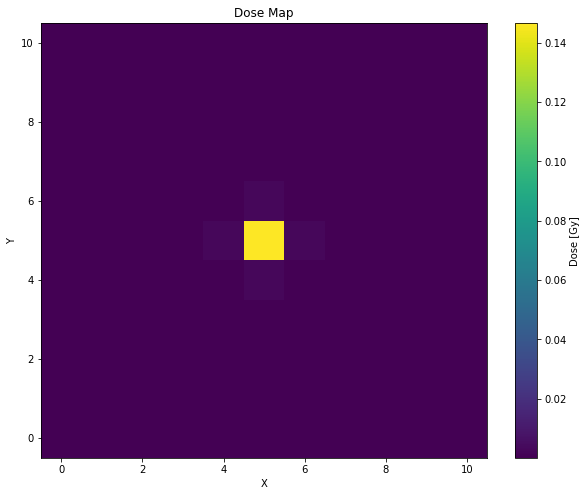

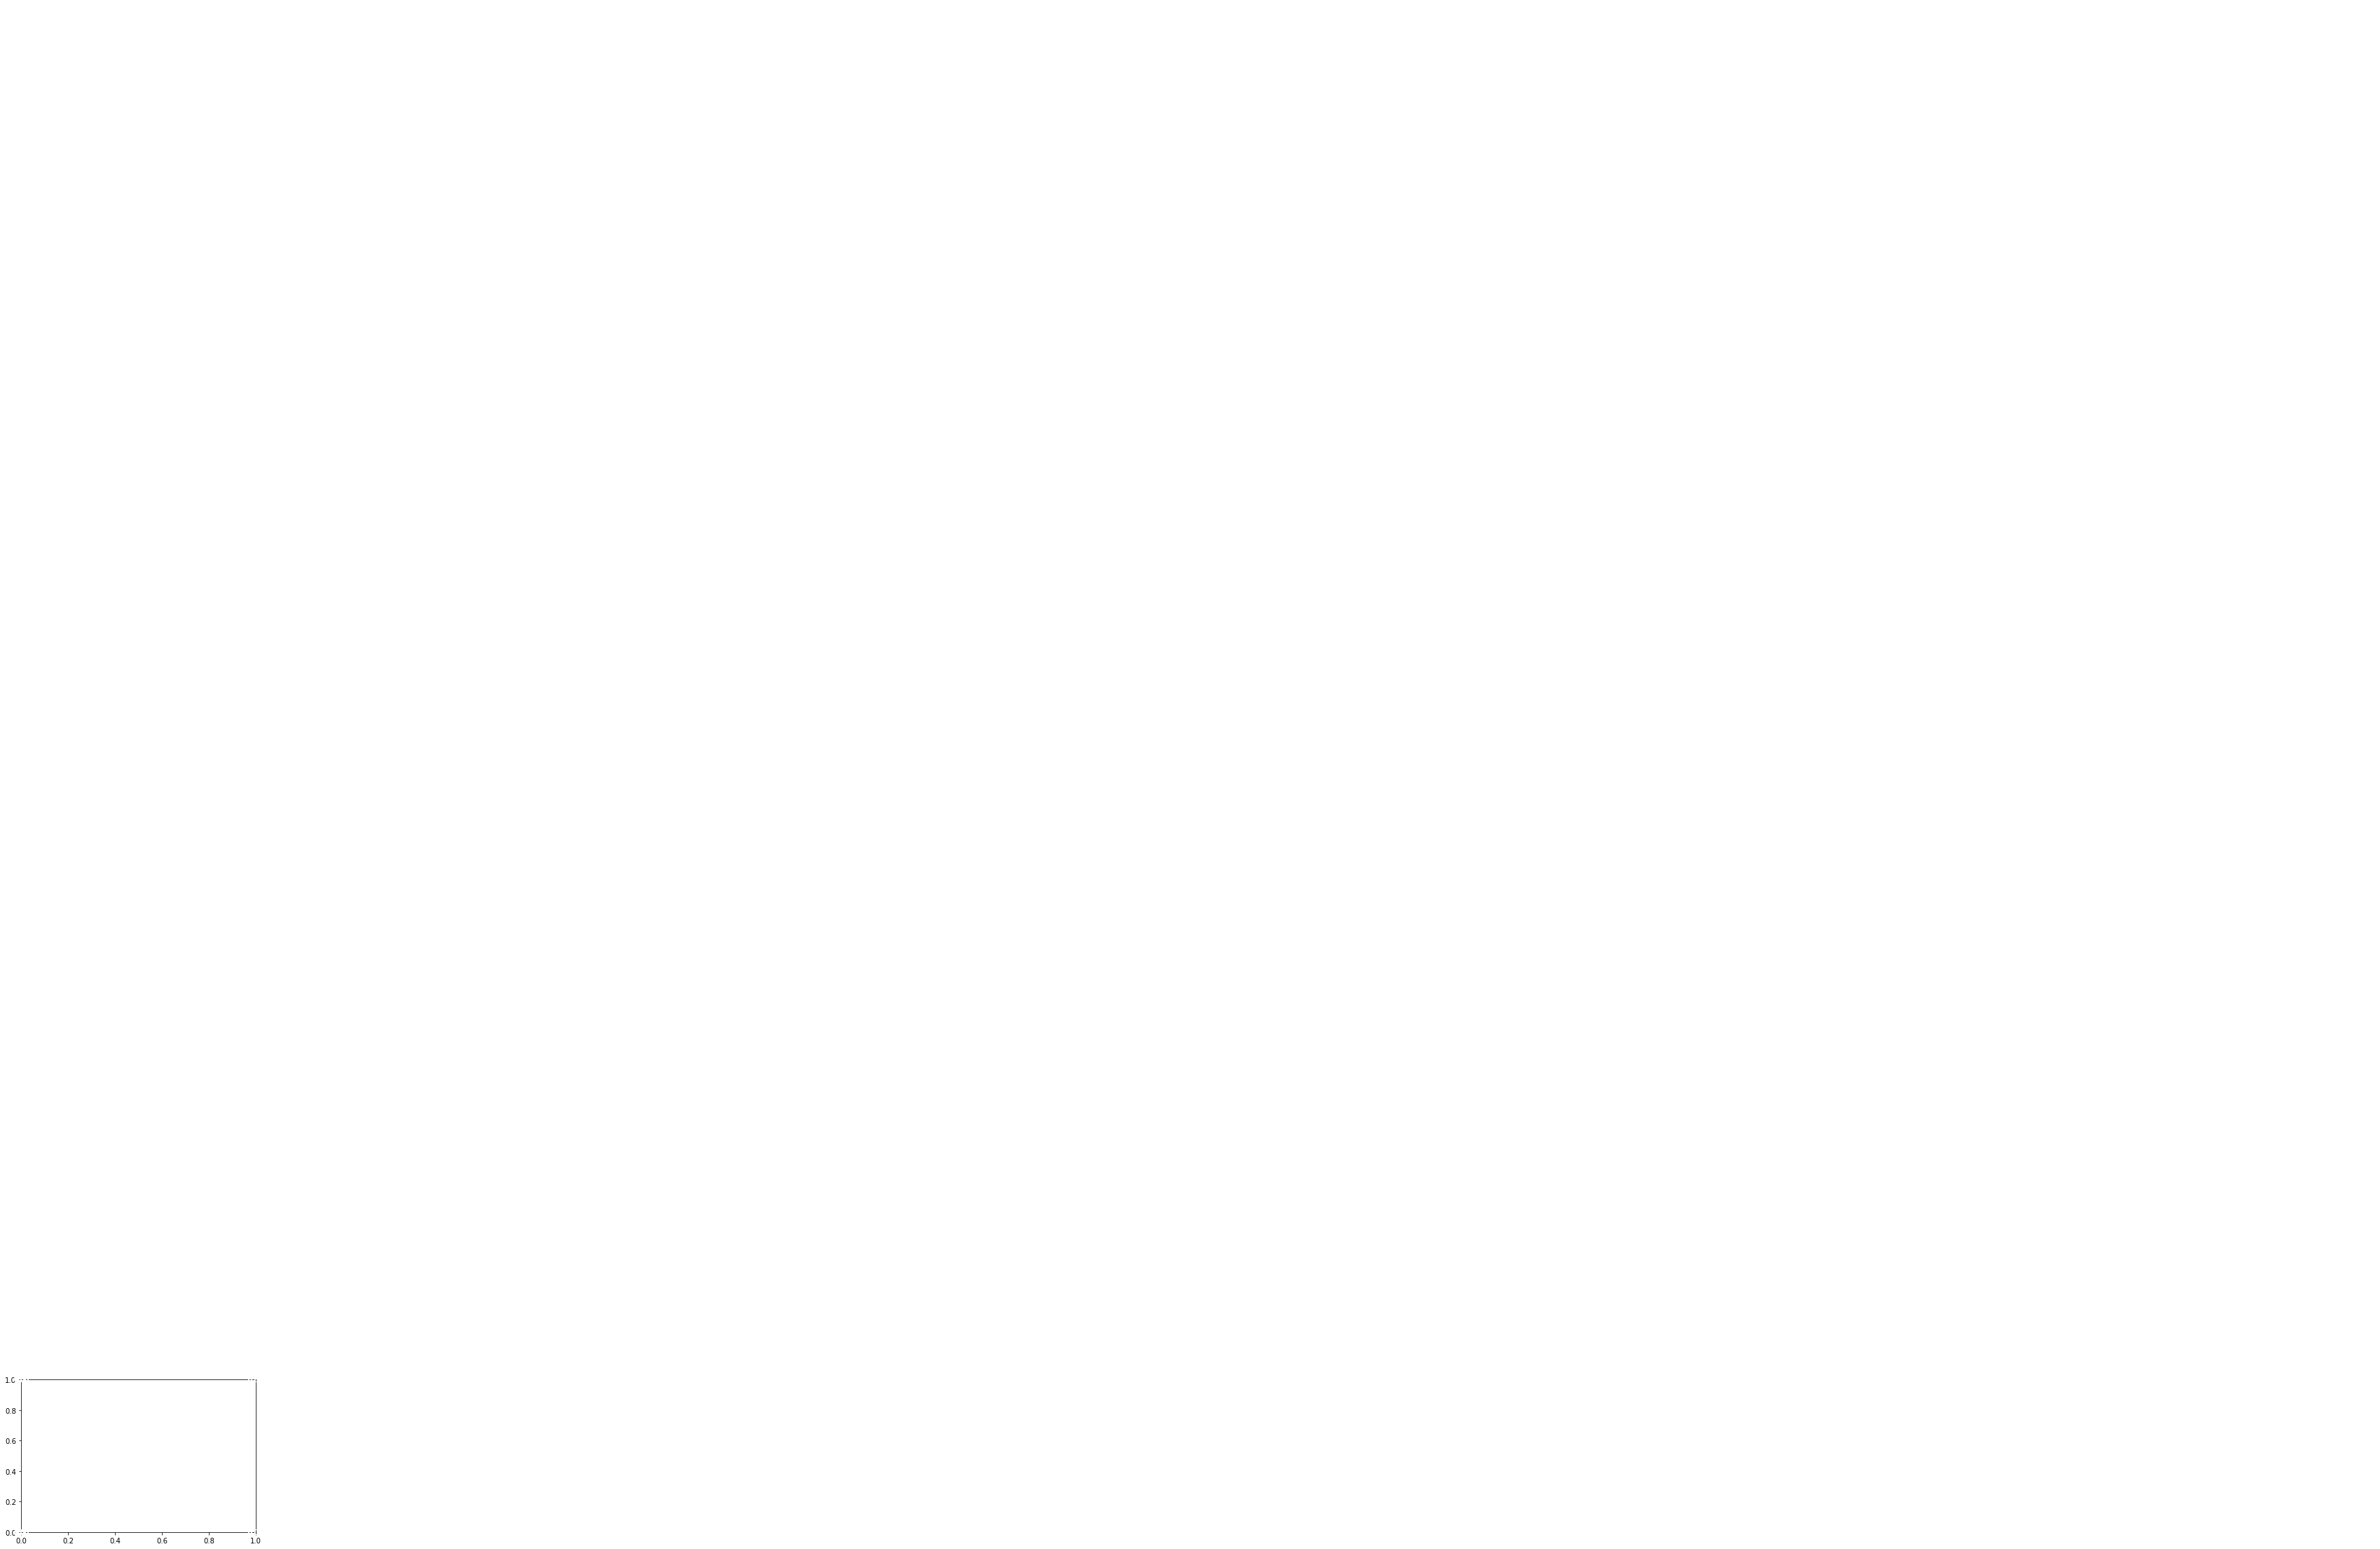

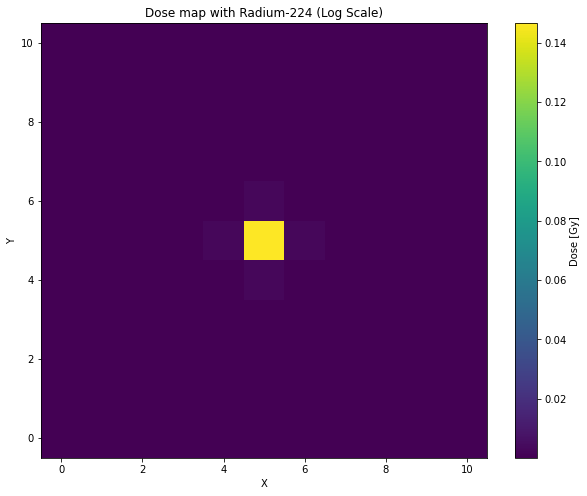

Total Dose Deposited on the X-axis:
X: 0, Total Dose: 0.00
X: 1, Total Dose: 0.00
X: 2, Total Dose: 0.00
X: 3, Total Dose: 0.00
X: 4, Total Dose: 0.05
X: 5, Total Dose: 11.16
X: 6, Total Dose: 0.05
X: 7, Total Dose: 0.00
X: 8, Total Dose: 0.00
X: 9, Total Dose: 0.00
X: 10, Total Dose: 0.00

Total Dose Deposited on the Y-axis:
Y: 0, Total Dose: 0.00
Y: 1, Total Dose: 0.00
Y: 2, Total Dose: 0.00
Y: 3, Total Dose: 0.00
Y: 4, Total Dose: 0.05
Y: 5, Total Dose: 11.16
Y: 6, Total Dose: 0.05
Y: 7, Total Dose: 0.00
Y: 8, Total Dose: 0.00
Y: 9, Total Dose: 0.00
Y: 10, Total Dose: 0.00


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iX', aggfunc='first').values

# Create a meshgrid for the X and Y coordinates
x, y = np.meshgrid(df['iX'].unique(), df['iY'].unique(), indexing='ij')

# Plot the dose map on XY axes
plt.figure(figsize=(10, 8))
plt.pcolormesh(x, y, dose_array, shading='auto')
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dose Map')
plt.show()

# Show the exact values of the total dose on the map
for i in range(len(df)):
    x_val = df.loc[i, 'iX']
    y_val = df.loc[i, 'iY']
    dose_val = df.loc[i, 'Dose [Gy]']
    plt.text(x_val, y_val, f'{dose_val:.2f}', ha='center', va='center', color='white')

plt.figure(figsize=(10, 8))
plt.pcolormesh(x, y, dose_array, shading='auto')
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dose map with Radium-224 (Log Scale)')
plt.show()

# Compute the total dose deposited at the X and Y axes
total_dose_x_axis = df.groupby('iX')['Dose [Gy]'].sum()
total_dose_y_axis = df.groupby('iY')['Dose [Gy]'].sum()

x_axis_value = np.unique(df['iX'].values)
y_axis_value = np.unique(df['iY'].values)

total_dose_x_values = total_dose_x_axis.values
total_dose_y_values = total_dose_y_axis.values

print("Total Dose Deposited on the X-axis:")
for x, dose in zip(x_axis_value, total_dose_x_values):
    print(f"X: {x}, Total Dose: {dose:.2f}")

print("\nTotal Dose Deposited on the Y-axis:")
for y, dose in zip(y_axis_value, total_dose_y_values):
    print(f"Y: {y}, Total Dose: {dose:.2f}")


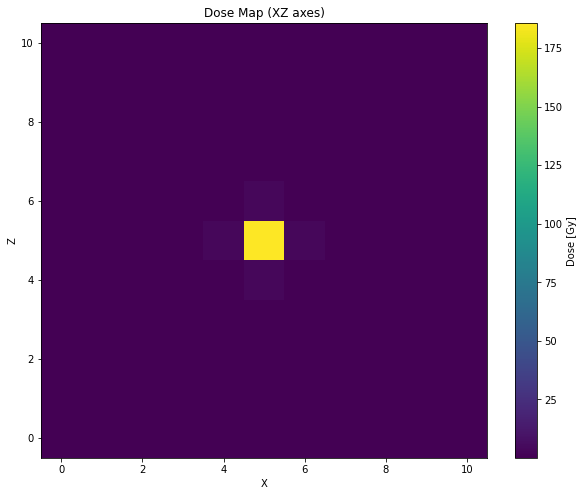

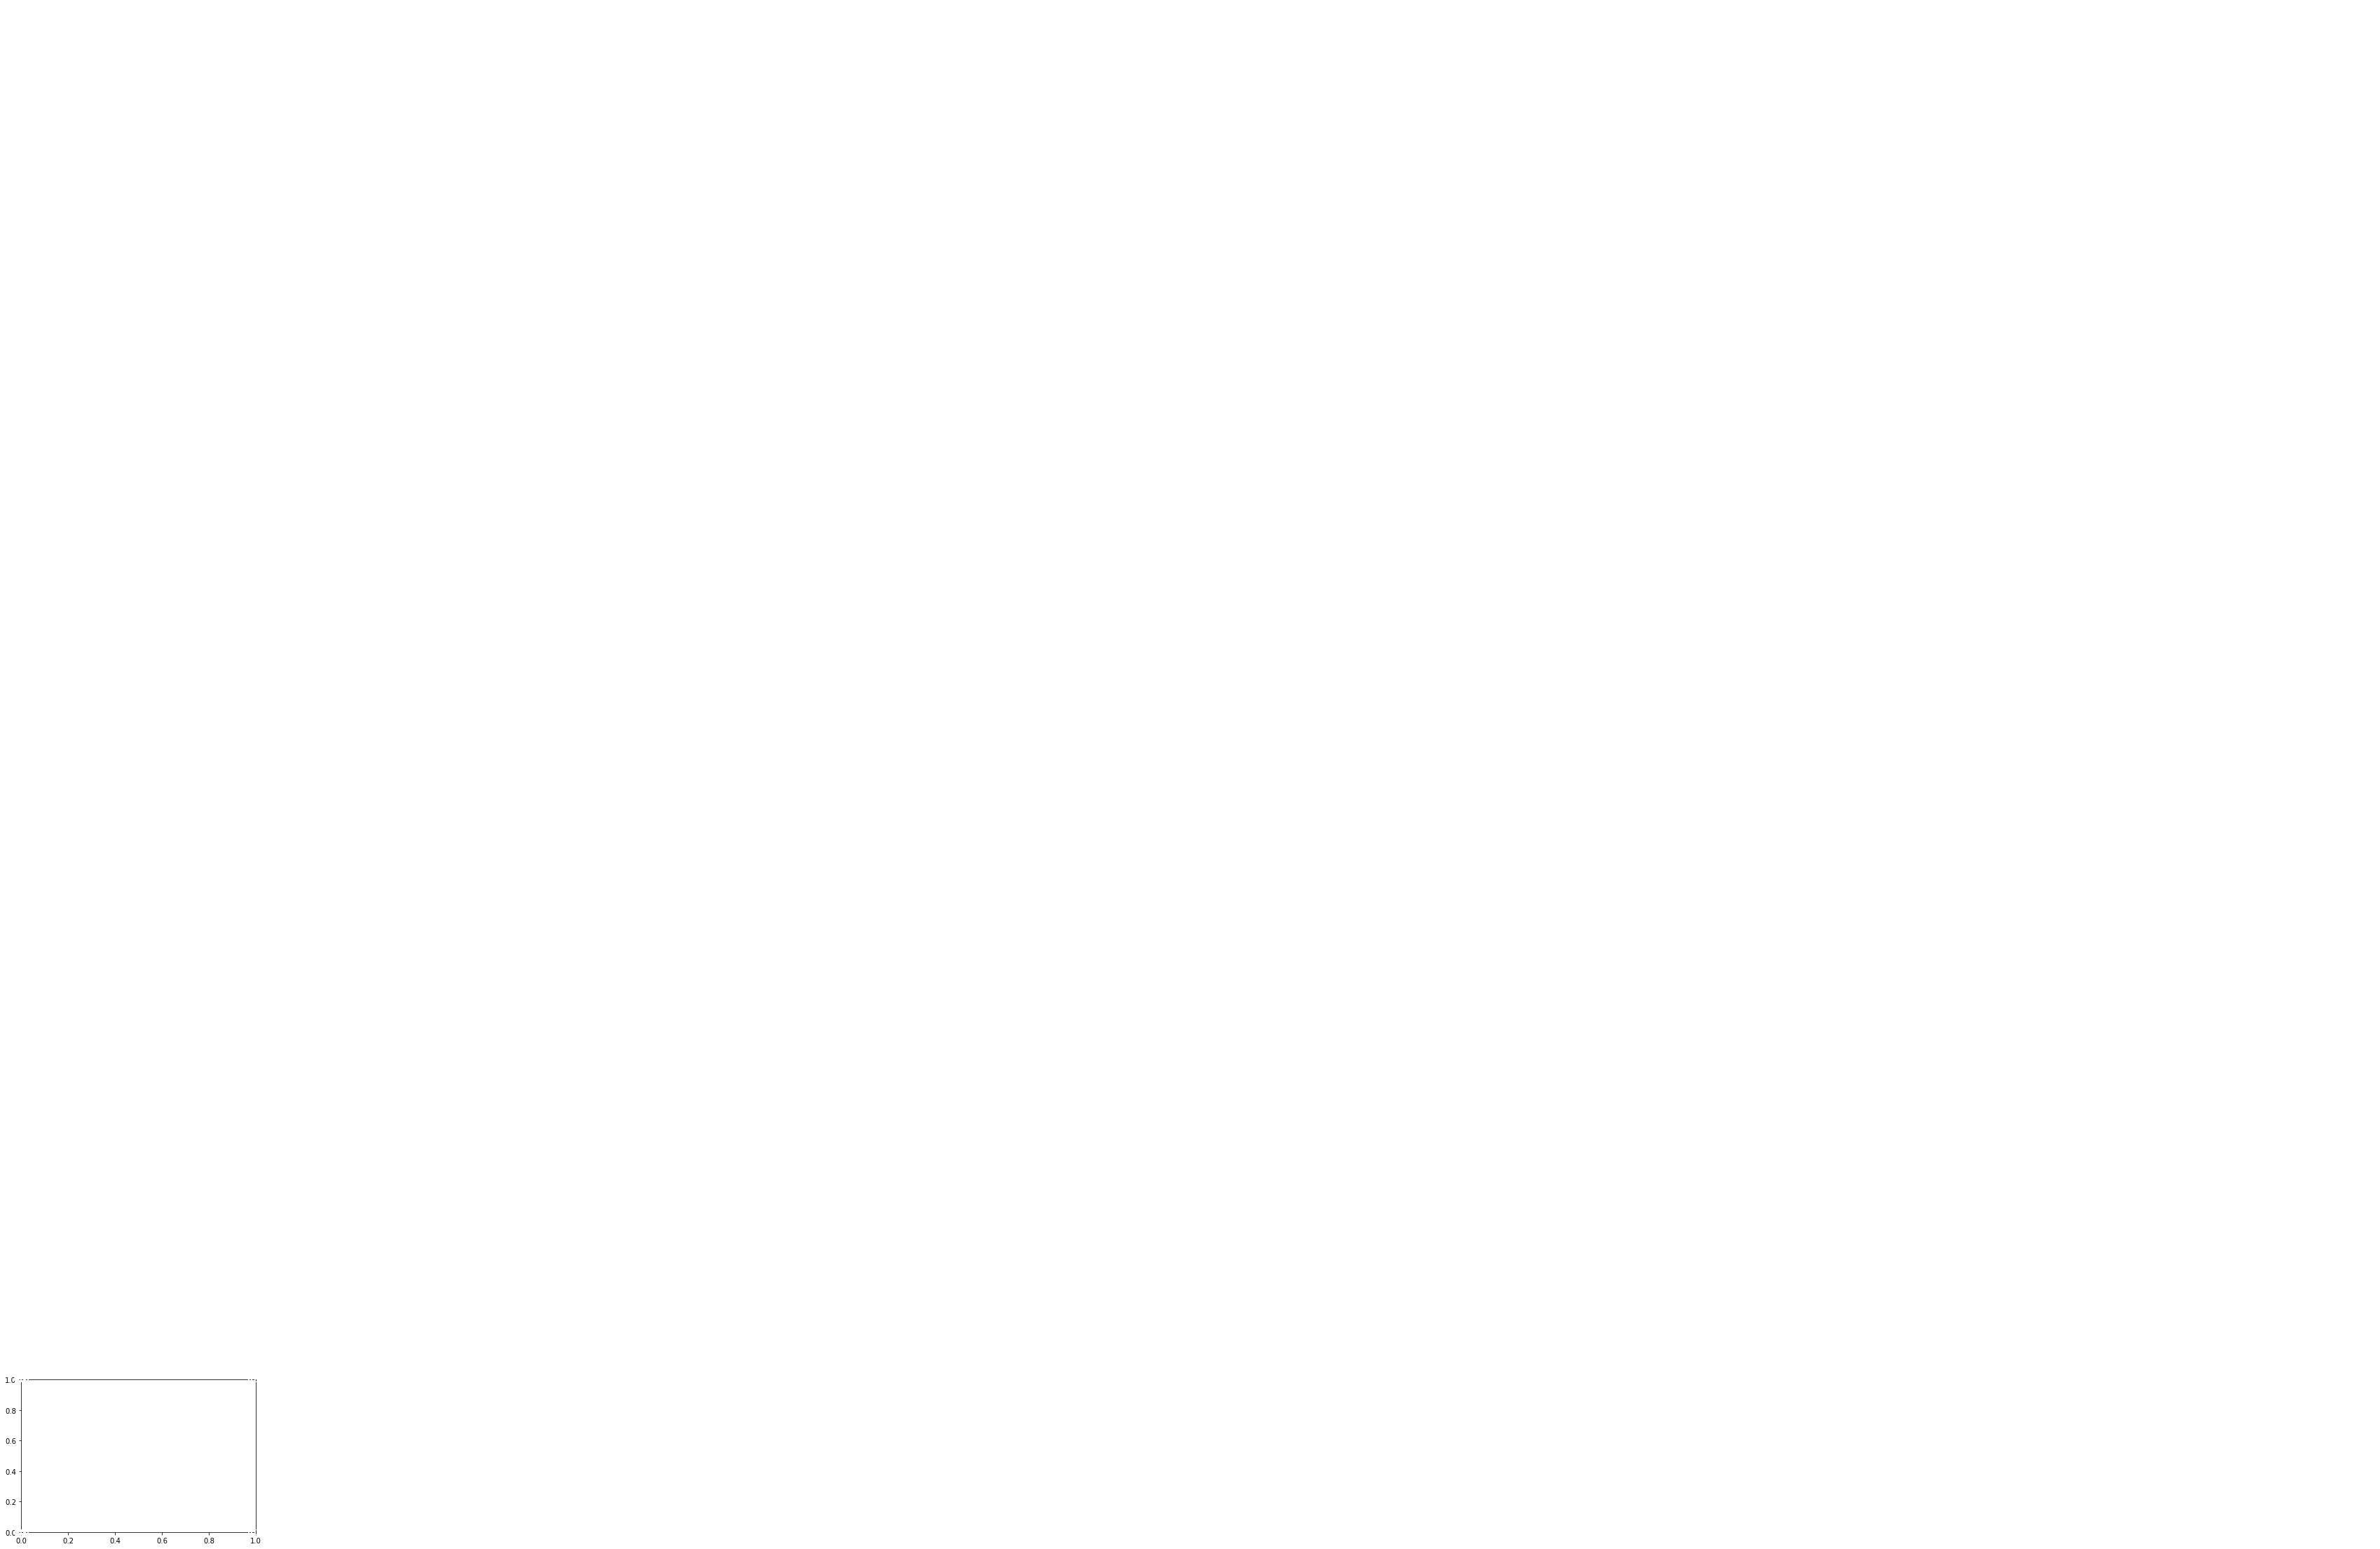

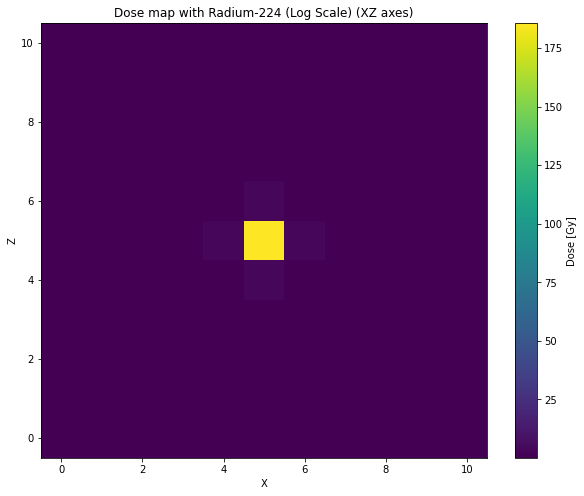

Total Dose Deposited on the X-axis:
X: 0, Total Dose: 0.21
X: 1, Total Dose: 0.30
X: 2, Total Dose: 0.43
X: 3, Total Dose: 0.64
X: 4, Total Dose: 29.67
X: 5, Total Dose: 2656.48
X: 6, Total Dose: 29.64
X: 7, Total Dose: 0.64
X: 8, Total Dose: 0.43
X: 9, Total Dose: 0.30
X: 10, Total Dose: 0.21

Total Dose Deposited on the Z-axis:
Z: 0, Total Dose: 202.69
Z: 1, Total Dose: 286.42
Z: 2, Total Dose: 286.73
Z: 3, Total Dose: 287.53
Z: 4, Total Dose: 287.26
Z: 5, Total Dose: 287.91
Z: 6, Total Dose: 288.49
Z: 7, Total Dose: 286.77
Z: 8, Total Dose: 286.54
Z: 9, Total Dose: 199.87
Z: 10, Total Dose: 18.72


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium31.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iX', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iX'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose map on XZ axes
plt.figure(figsize=(10, 8))
plt.pcolormesh(x, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the XZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Dose Map (XZ axes)')
plt.show()

# Show the exact values of the total dose on the map
for i in range(len(df)):
    x_val = df.loc[i, 'iX']
    z_val = df.loc[i, 'iZ']
    dose_val = df.loc[i, 'Dose [Gy]']
    plt.text(x_val, z_val, f'{dose_val:.2f}', ha='center', va='center', color='white')

plt.figure(figsize=(10, 8))
plt.pcolormesh(x, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the XZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Dose map with Radium-224 (Log Scale) (XZ axes)')
plt.show()

# Compute the total dose deposited at the X and Z axes
total_dose_x_axis = df.groupby('iX')['Dose [Gy]'].sum()
total_dose_z_axis = df.groupby('iZ')['Dose [Gy]'].sum()

x_axis_value = np.unique(df['iX'].values)
z_axis_value = np.unique(df['iZ'].values)

total_dose_x_values = total_dose_x_axis.values
total_dose_z_values = total_dose_z_axis.values

print("Total Dose Deposited on the X-axis:")
for x, dose in zip(x_axis_value, total_dose_x_values):
    print(f"X: {x}, Total Dose: {dose:.2f}")

print("\nTotal Dose Deposited on the Z-axis:")
for z, dose in zip(z_axis_value, total_dose_z_values):
    print(f"Z: {z}, Total Dose: {dose:.2f}")


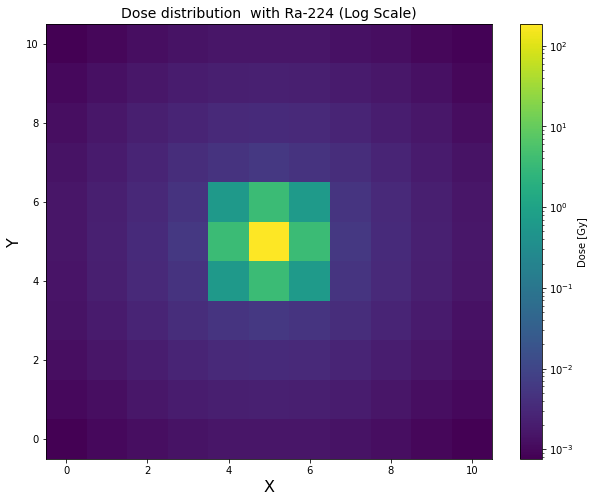

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium31.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iX', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
y, z = np.meshgrid(df['iY'].unique(), df['iX'].unique(), indexing='ij')

# Plot the dose map using a logarithmic scale
plt.figure(figsize=(10, 8))
plt.pcolormesh(y, z, dose_array, shading='auto', norm=LogNorm())
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.title('Dose distribution  with Ra-224 (Log Scale)', fontsize=14)
# Save the figure with a white background
plt.savefig('dose_xy_Ra.png', facecolor='white')
plt.show()






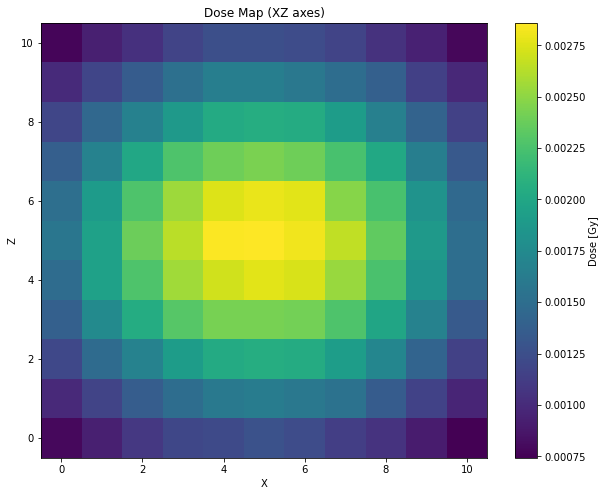

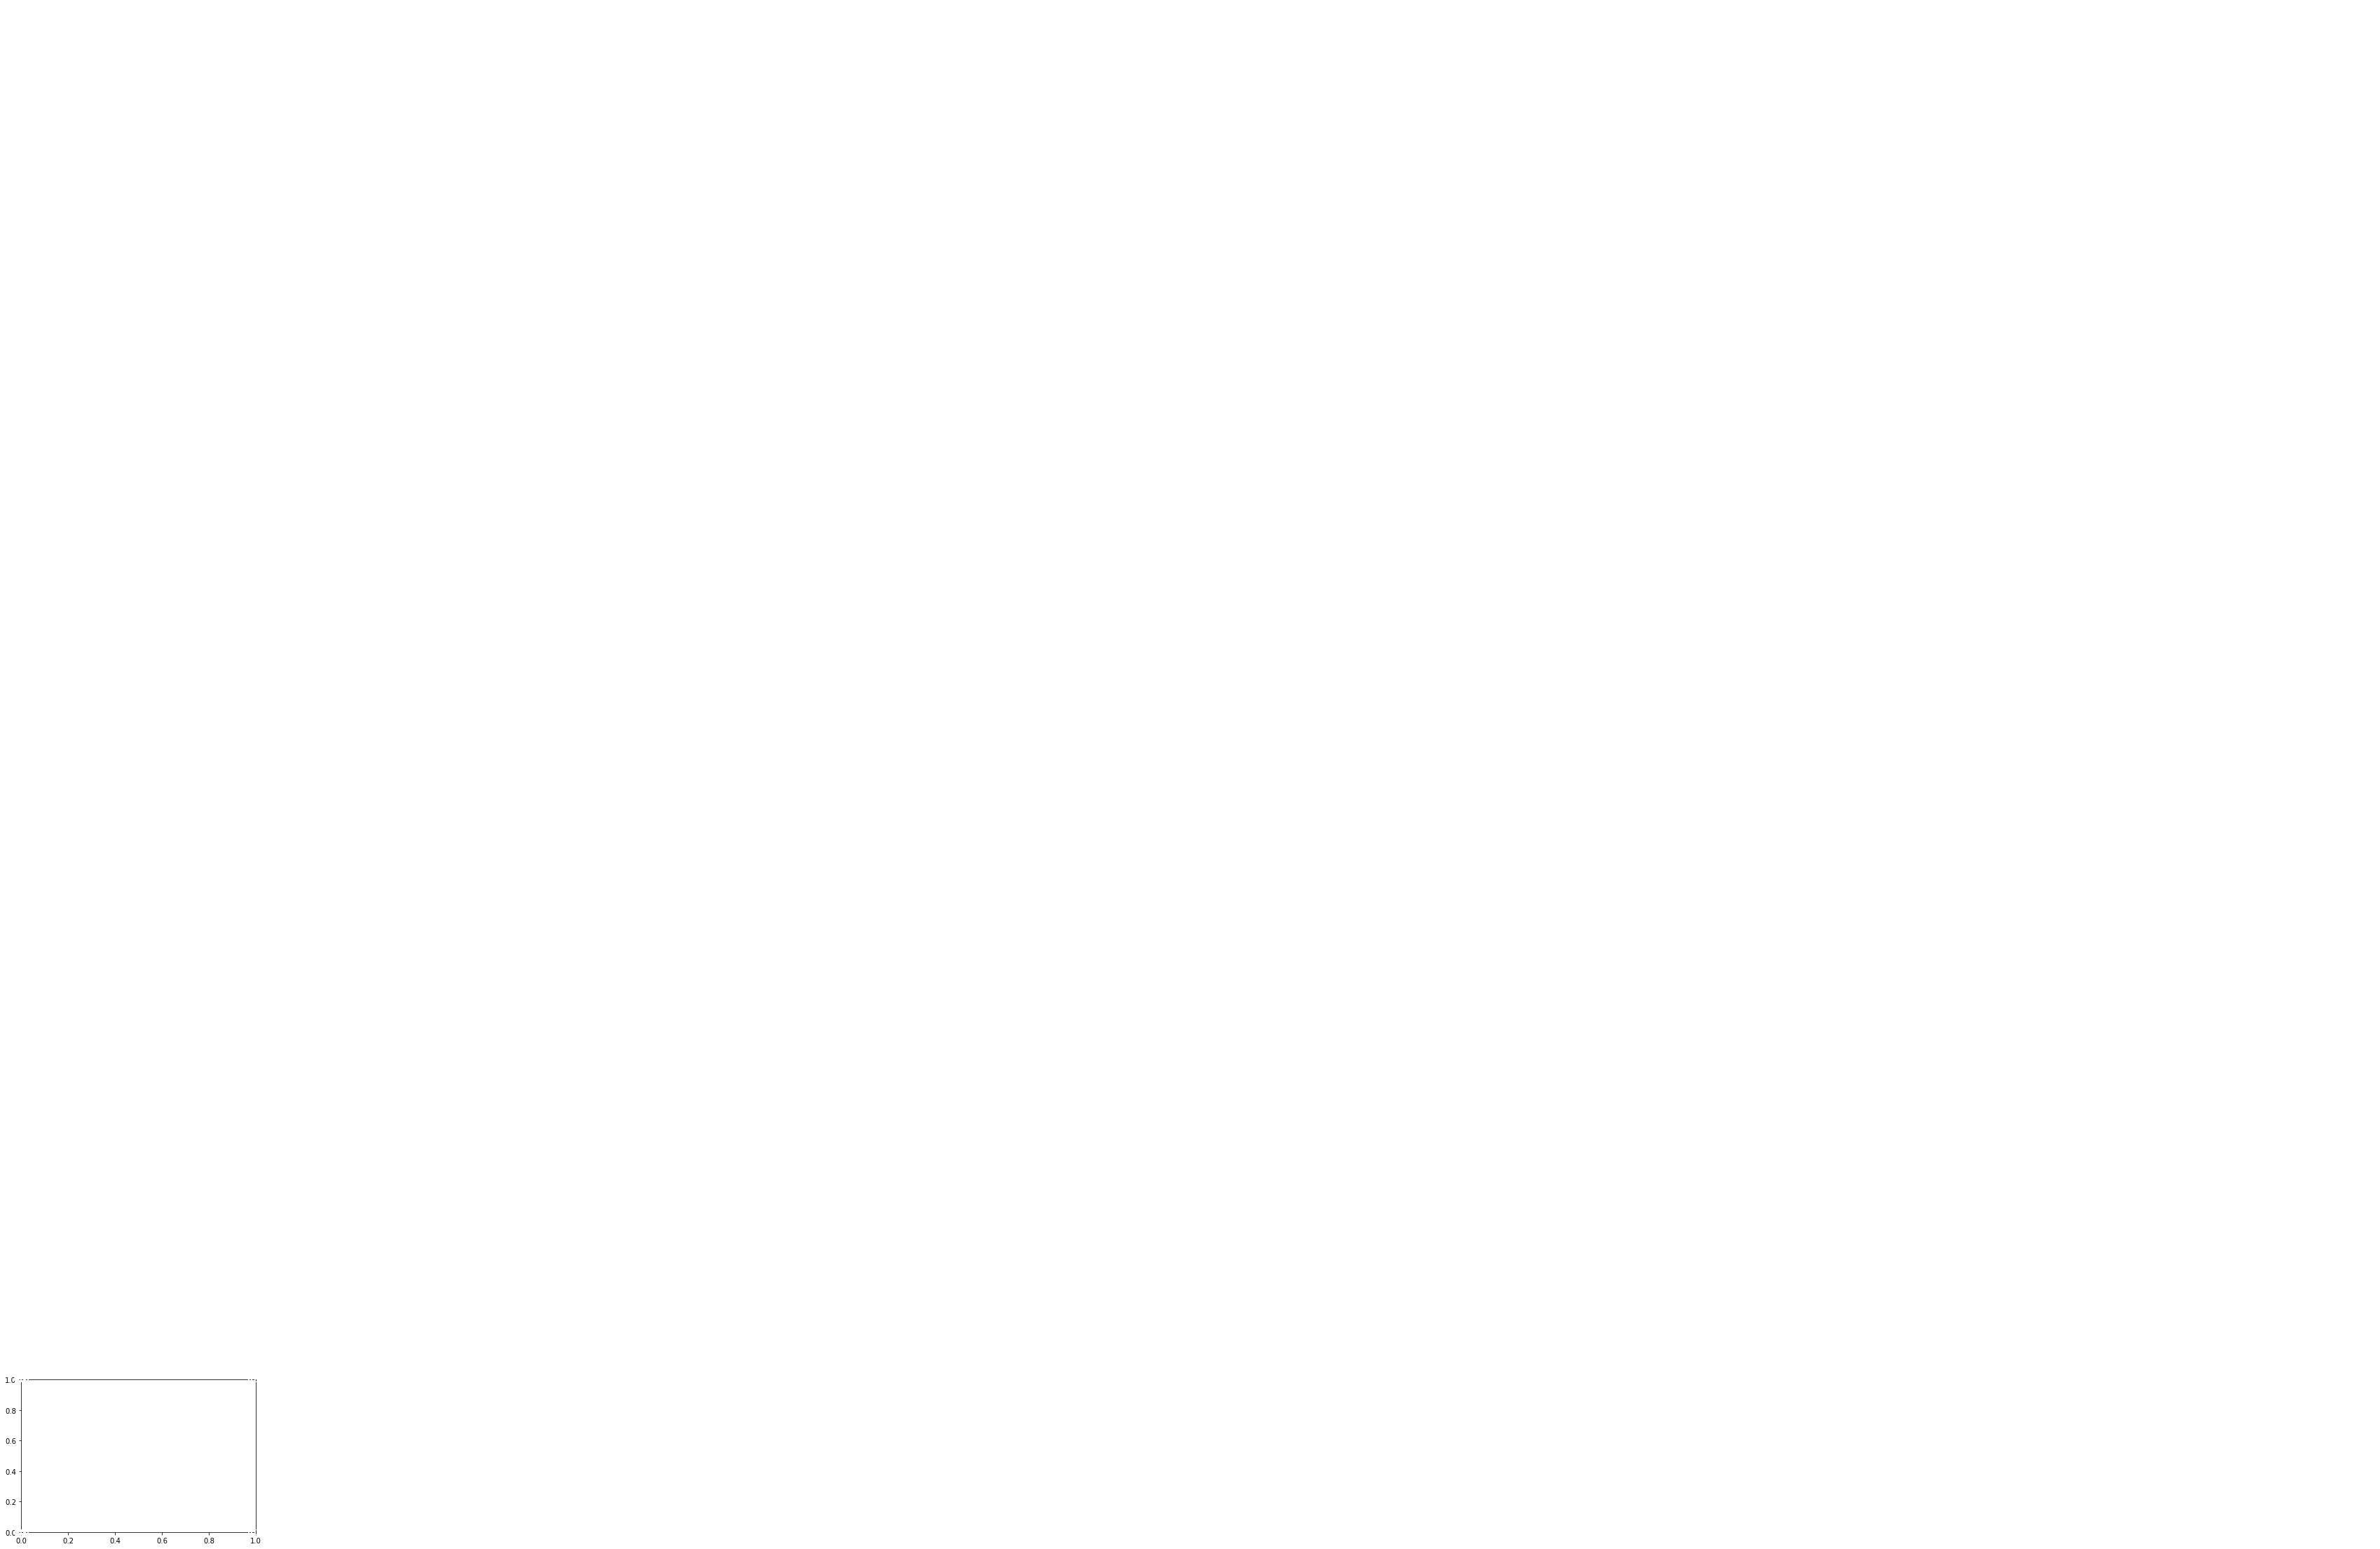

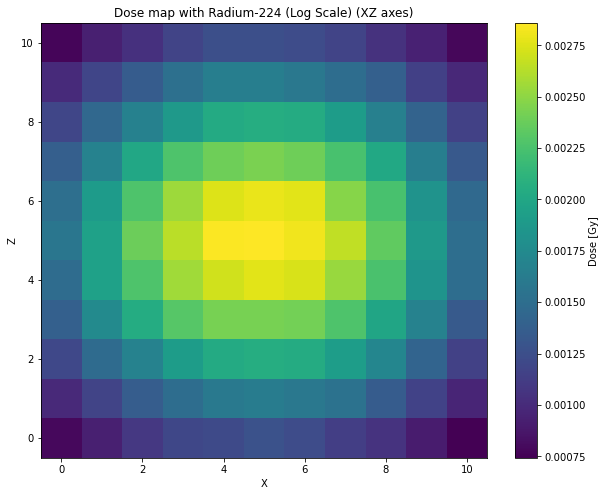

Total Dose Deposited on the X-axis:
X: 0, Total Dose: 0.21
X: 1, Total Dose: 0.30
X: 2, Total Dose: 0.43
X: 3, Total Dose: 0.64
X: 4, Total Dose: 29.67
X: 5, Total Dose: 2656.48
X: 6, Total Dose: 29.64
X: 7, Total Dose: 0.64
X: 8, Total Dose: 0.43
X: 9, Total Dose: 0.30
X: 10, Total Dose: 0.21

Total Dose Deposited on the Z-axis:
Z: 0, Total Dose: 202.69
Z: 1, Total Dose: 286.42
Z: 2, Total Dose: 286.73
Z: 3, Total Dose: 287.53
Z: 4, Total Dose: 287.26
Z: 5, Total Dose: 287.91
Z: 6, Total Dose: 288.49
Z: 7, Total Dose: 286.77
Z: 8, Total Dose: 286.54
Z: 9, Total Dose: 199.87
Z: 10, Total Dose: 18.72


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium31.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iX', columns='iZ', aggfunc='first').values

# Create a meshgrid for the X and Z coordinates
x, z = np.meshgrid(df['iX'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose map on XZ axes
plt.figure(figsize=(10, 8))
plt.pcolormesh(x, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the XZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Dose Map (XZ axes)')
plt.show()

# Show the exact values of the total dose on the map
for i in range(len(df)):
    x_val = df.loc[i, 'iX']
    z_val = df.loc[i, 'iZ']
    dose_val = df.loc[i, 'Dose [Gy]']
    plt.text(x_val, z_val, f'{dose_val:.2f}', ha='center', va='center', color='white')

plt.figure(figsize=(10, 8))
plt.pcolormesh(x, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the XZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Dose map with Radium-224 (Log Scale) (XZ axes)')
plt.show()

# Compute the total dose deposited at the X and Z axes
total_dose_x_axis = df.groupby('iX')['Dose [Gy]'].sum()
total_dose_z_axis = df.groupby('iZ')['Dose [Gy]'].sum()

x_axis_value = np.unique(df['iX'].values)
z_axis_value = np.unique(df['iZ'].values)

total_dose_x_values = total_dose_x_axis.values
total_dose_z_values = total_dose_z_axis.values

print("Total Dose Deposited on the X-axis:")
for x, dose in zip(x_axis_value, total_dose_x_values):
    print(f"X: {x}, Total Dose: {dose:.2f}")

print("\nTotal Dose Deposited on the Z-axis:")
for z, dose in zip(z_axis_value, total_dose_z_values):
    print(f"Z: {z}, Total Dose: {dose:.2f}")


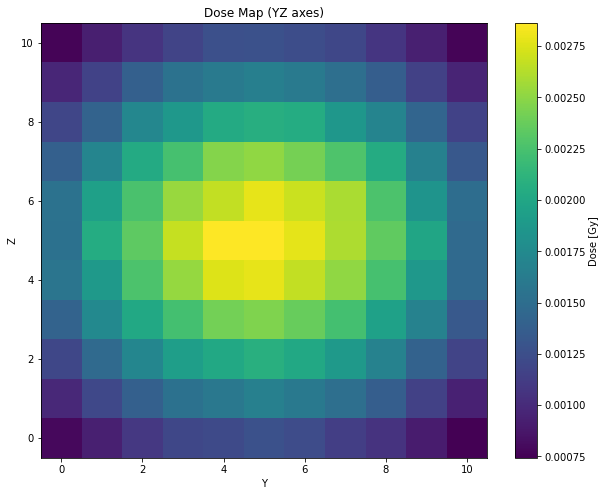

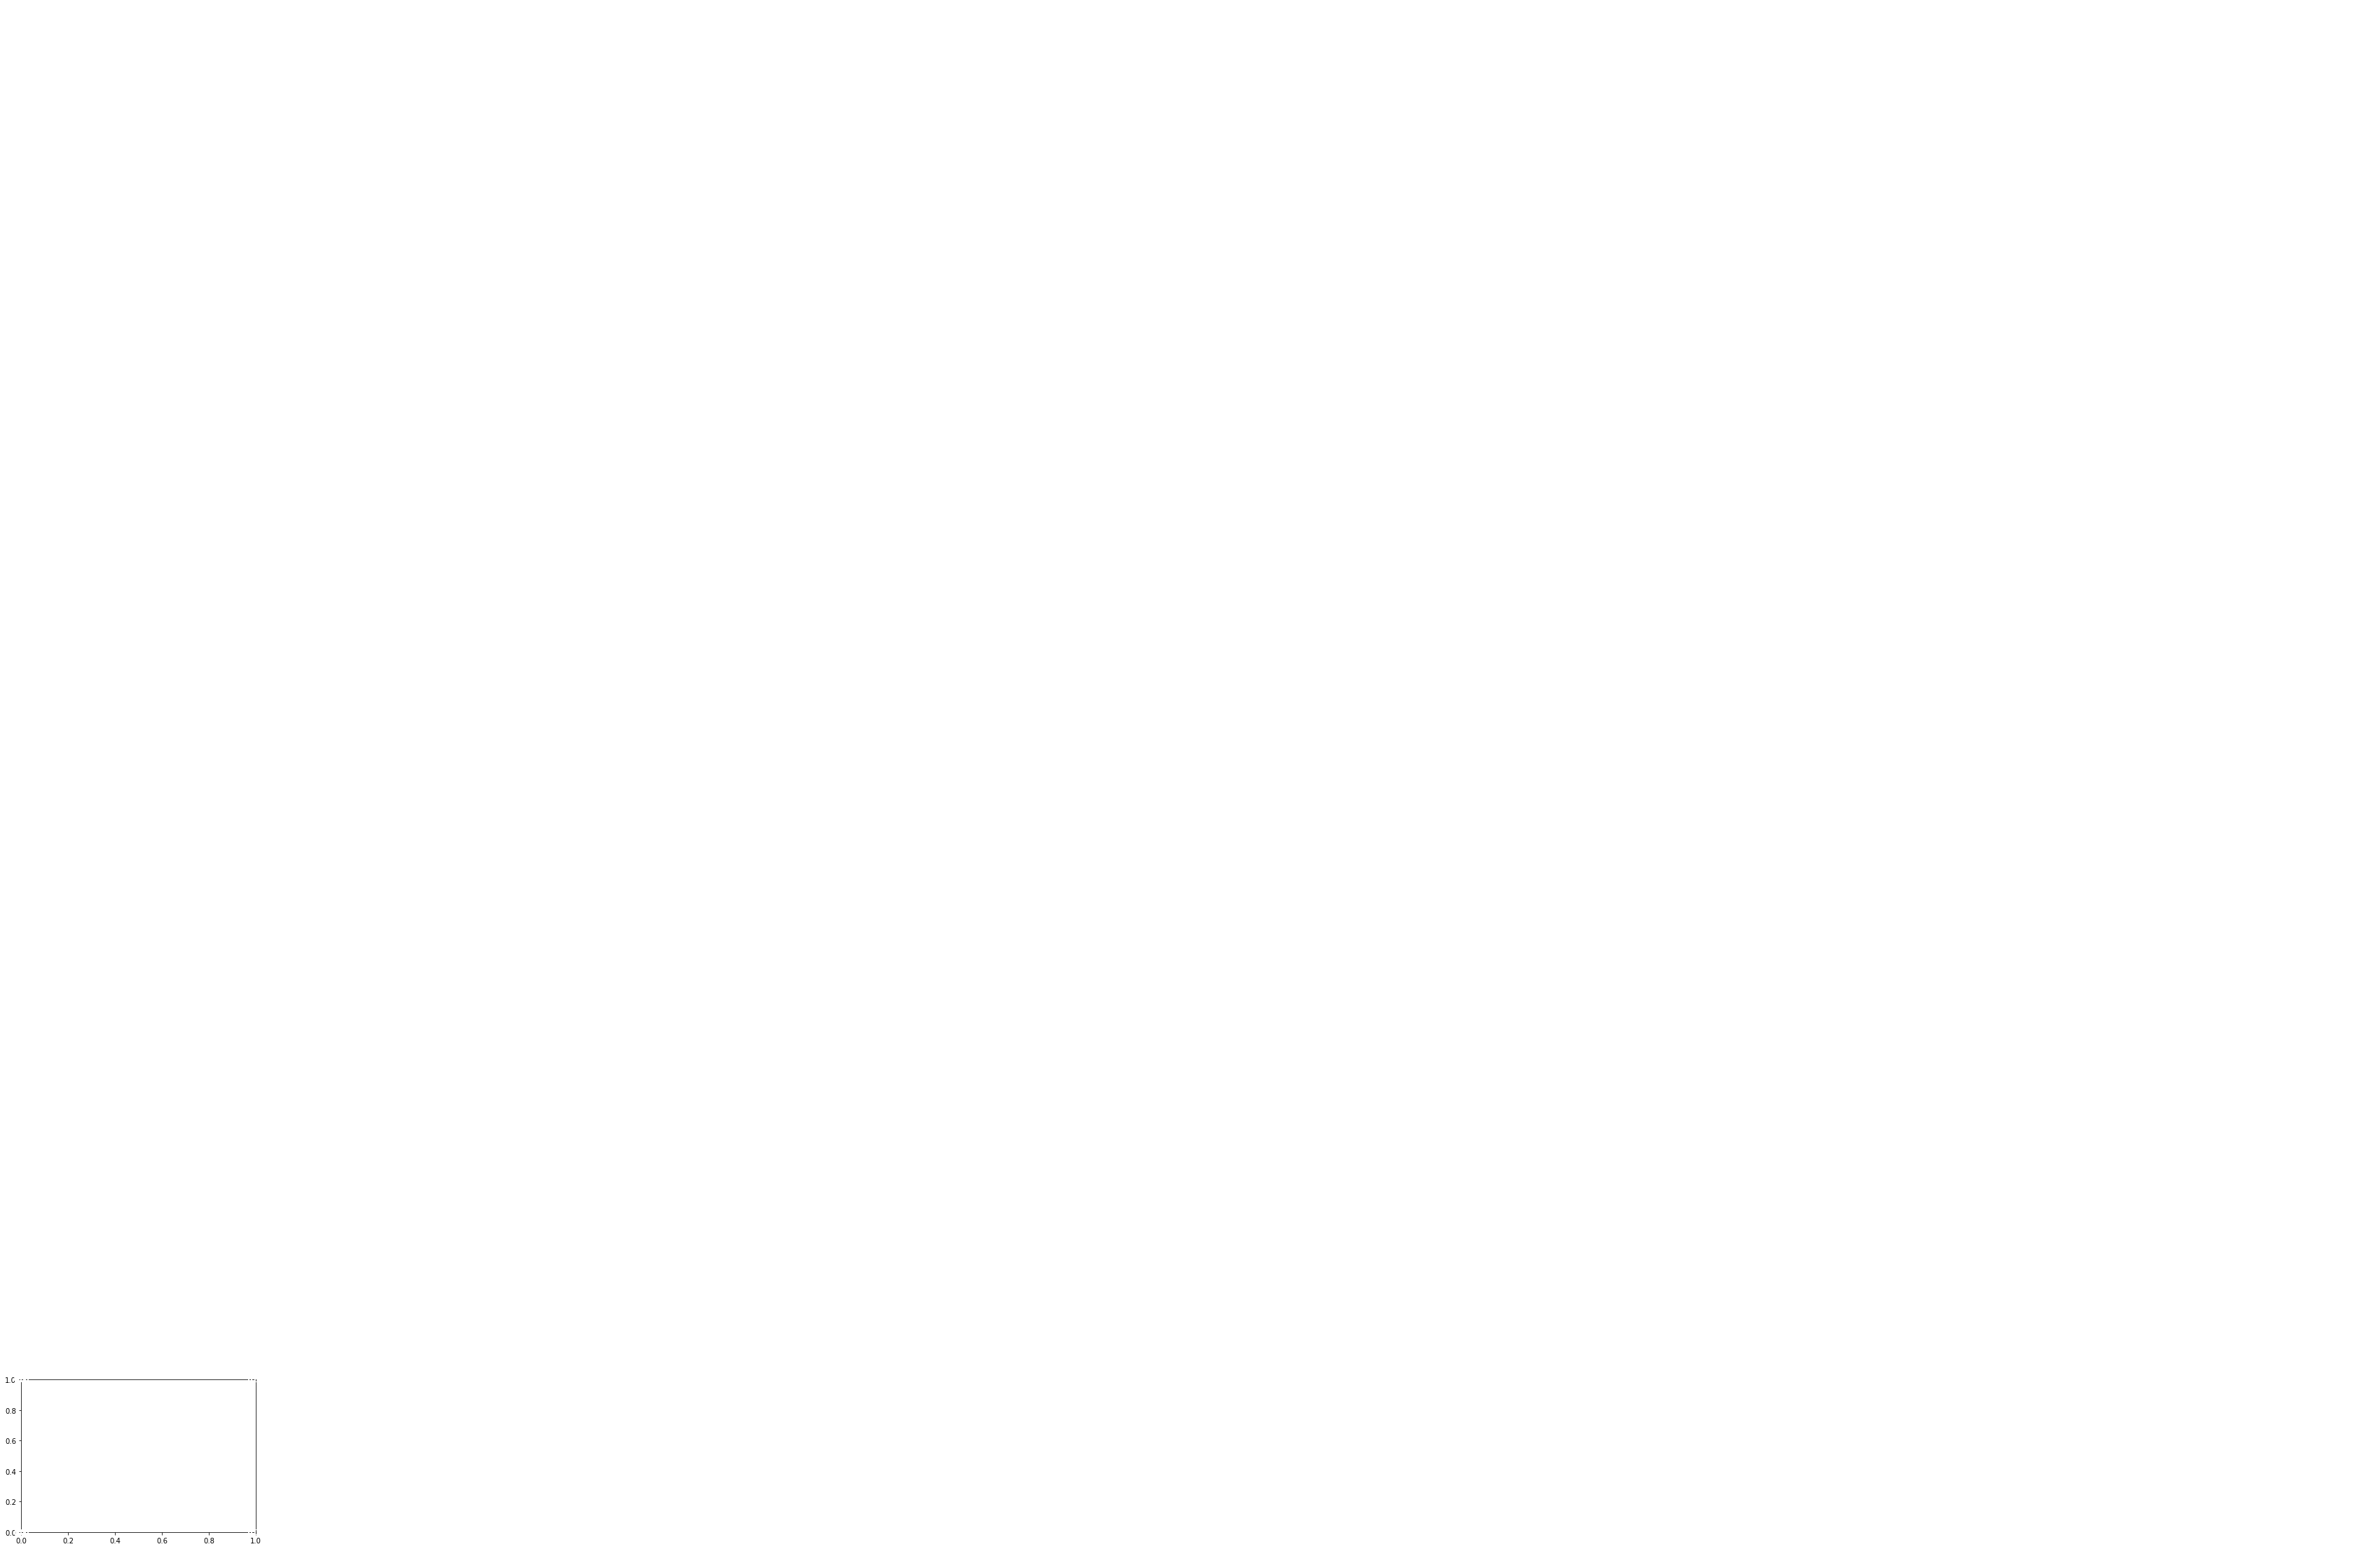

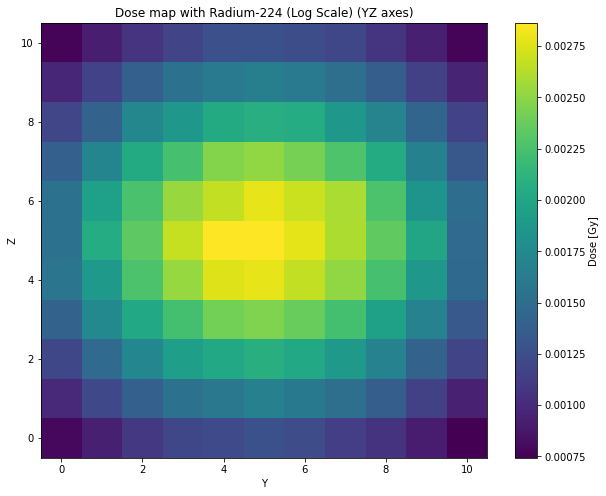

Total Dose Deposited on the Y-axis:
Y: 0, Total Dose: 0.21
Y: 1, Total Dose: 0.30
Y: 2, Total Dose: 0.43
Y: 3, Total Dose: 0.64
Y: 4, Total Dose: 29.65
Y: 5, Total Dose: 2656.53
Y: 6, Total Dose: 29.61
Y: 7, Total Dose: 0.64
Y: 8, Total Dose: 0.43
Y: 9, Total Dose: 0.30
Y: 10, Total Dose: 0.21

Total Dose Deposited on the Z-axis:
Z: 0, Total Dose: 202.69
Z: 1, Total Dose: 286.42
Z: 2, Total Dose: 286.73
Z: 3, Total Dose: 287.53
Z: 4, Total Dose: 287.26
Z: 5, Total Dose: 287.91
Z: 6, Total Dose: 288.49
Z: 7, Total Dose: 286.77
Z: 8, Total Dose: 286.54
Z: 9, Total Dose: 199.87
Z: 10, Total Dose: 18.72


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium31.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates
y, z = np.meshgrid(df['iY'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose map on YZ axes
plt.figure(figsize=(10, 8))
plt.pcolormesh(y, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the YZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Dose Map (YZ axes)')
plt.show()

# Show the exact values of the total dose on the map
for i in range(len(df)):
    y_val = df.loc[i, 'iY']
    z_val = df.loc[i, 'iZ']
    dose_val = df.loc[i, 'Dose [Gy]']
    plt.text(y_val, z_val, f'{dose_val:.2f}', ha='center', va='center', color='white')

plt.figure(figsize=(10, 8))
plt.pcolormesh(y, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the YZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Dose map with Radium-224 (Log Scale) (YZ axes)')
plt.show()

# Compute the total dose deposited at the Y and Z axes
total_dose_y_axis = df.groupby('iY')['Dose [Gy]'].sum()
total_dose_z_axis = df.groupby('iZ')['Dose [Gy]'].sum()

y_axis_value = np.unique(df['iY'].values)
z_axis_value = np.unique(df['iZ'].values)

total_dose_y_values = total_dose_y_axis.values
total_dose_z_values = total_dose_z_axis.values

print("Total Dose Deposited on the Y-axis:")
for y, dose in zip(y_axis_value, total_dose_y_values):
    print(f"Y: {y}, Total Dose: {dose:.2f}")

print("\nTotal Dose Deposited on the Z-axis:")
for z, dose in zip(z_axis_value, total_dose_z_values):
    print(f"Z: {z}, Total Dose: {dose:.2f}")


Total Dose 1: 0.8167168534152657 Gy
Total Dose 2: 0.00045696946064007697 Gy


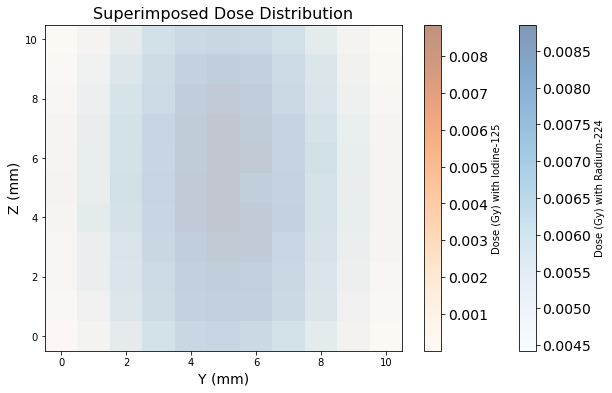

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the first dose file into a pandas DataFrame
df1 = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array1 = df1.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the first dose distribution
y1, z1 = np.meshgrid(df1['iY'].unique(), df1['iZ'].unique(), indexing='ij')

# Read the second dose file into a pandas DataFrame
df2 = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array2 = df2.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the second dose distribution
y2, z2 = np.meshgrid(df2['iY'].unique(), df2['iZ'].unique(), indexing='ij')

# Determine the common maximum dose value for consistent scaling
max_dose = max(np.max(dose_array1), np.max(dose_array2))

# Plot the first dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Y (mm)', fontsize=14)  # Set the Y-axis label
ax.set_ylabel('Z (mm)', fontsize=14)  # Set the Z-axis label
ax.set_title('Superimposed Dose Distribution', fontsize=16)

im1 = ax.pcolormesh(y1, z1, dose_array1, cmap='Blues', alpha=0.5, vmax=max_dose)
im2 = ax.pcolormesh(y2, z2, dose_array2, cmap='Oranges', alpha=0.5, vmax=max_dose)

# Add colorbars for both dose distributions
cbar1 = fig.colorbar(im1, ax=ax, label='Dose (Gy) with Radium-224')
cbar1.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

cbar2 = fig.colorbar(im2, ax=ax, label='Dose (Gy) with Iodine-125')
cbar2.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

# Calculate the total dose for each distribution
total_dose1 = np.sum(dose_array1)
total_dose2 = np.sum(dose_array2)

# Print the total doses
print("Total Dose 1: {} Gy".format(total_dose1))
print("Total Dose 2: {} Gy".format(total_dose2))

# Save the figure with a white background
plt.savefig('superimposed_dose.png', facecolor='white')

# Display the plot
plt.show()


Total Dose 1: 0.8167168534152657 Gy
Total Dose 2: 0.00045696946064007697 Gy
dose_per_column1: [0.06882278 0.0726638  0.0742033  0.07589794 0.07764428 0.07748465
 0.07754104 0.07701524 0.07480765 0.0722961  0.06834008] Gy
dose_per_column2: [3.00178857e-05 3.82349981e-05 4.25730519e-05 4.76377405e-05
 4.64058959e-05 5.07304013e-05 5.01302348e-05 4.58905180e-05
 4.11825914e-05 3.34852294e-05 3.06809136e-05] Gy


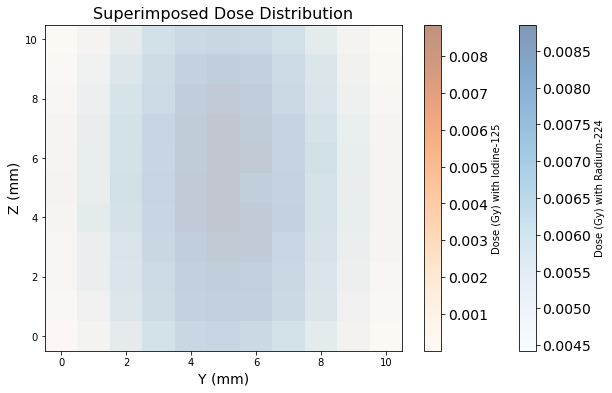

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the first dose file into a pandas DataFrame
df1 = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array1 = df1.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the first dose distribution
y1, z1 = np.meshgrid(df1['iY'].unique(), df1['iZ'].unique(), indexing='ij')

# Read the second dose file into a pandas DataFrame
df2 = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array2 = df2.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the second dose distribution
y2, z2 = np.meshgrid(df2['iY'].unique(), df2['iZ'].unique(), indexing='ij')

# Determine the common maximum dose value for consistent scaling
max_dose = max(np.max(dose_array1), np.max(dose_array2))

# Plot the first dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Y (mm)', fontsize=14)  # Set the Y-axis label
ax.set_ylabel('Z (mm)', fontsize=14)  # Set the Z-axis label
ax.set_title('Superimposed Dose Distribution', fontsize=16)

im1 = ax.pcolormesh(y1, z1, dose_array1, cmap='Blues', alpha=0.5, vmax=max_dose)
im2 = ax.pcolormesh(y2, z2, dose_array2, cmap='Oranges', alpha=0.5, vmax=max_dose)

# Add colorbars for both dose distributions
cbar1 = fig.colorbar(im1, ax=ax, label='Dose (Gy) with Radium-224')
cbar1.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

cbar2 = fig.colorbar(im2, ax=ax, label='Dose (Gy) with Iodine-125')
cbar2.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

# Calculate the total dose for each distribution
total_dose1 = np.sum(dose_array1)
total_dose2 = np.sum(dose_array2)

# Compute the dose deposited on each column
dose_per_column1 = np.sum(dose_array1, axis=0)
dose_per_column2 = np.sum(dose_array2, axis=0)

# Print the total doses
print("Total Dose 1: {} Gy".format(total_dose1))
print("Total Dose 2: {} Gy".format(total_dose2))

# Print the dose deposited on each column
# Print the total doses
print("dose_per_column1: {} Gy".format(dose_per_column1))
print("dose_per_column2: {} Gy".format(dose_per_column2))


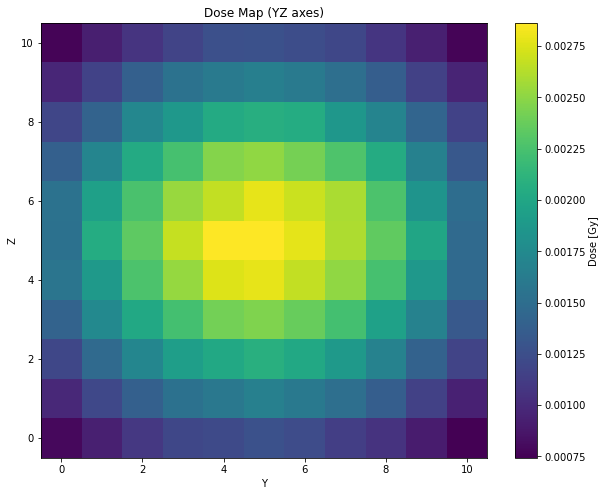

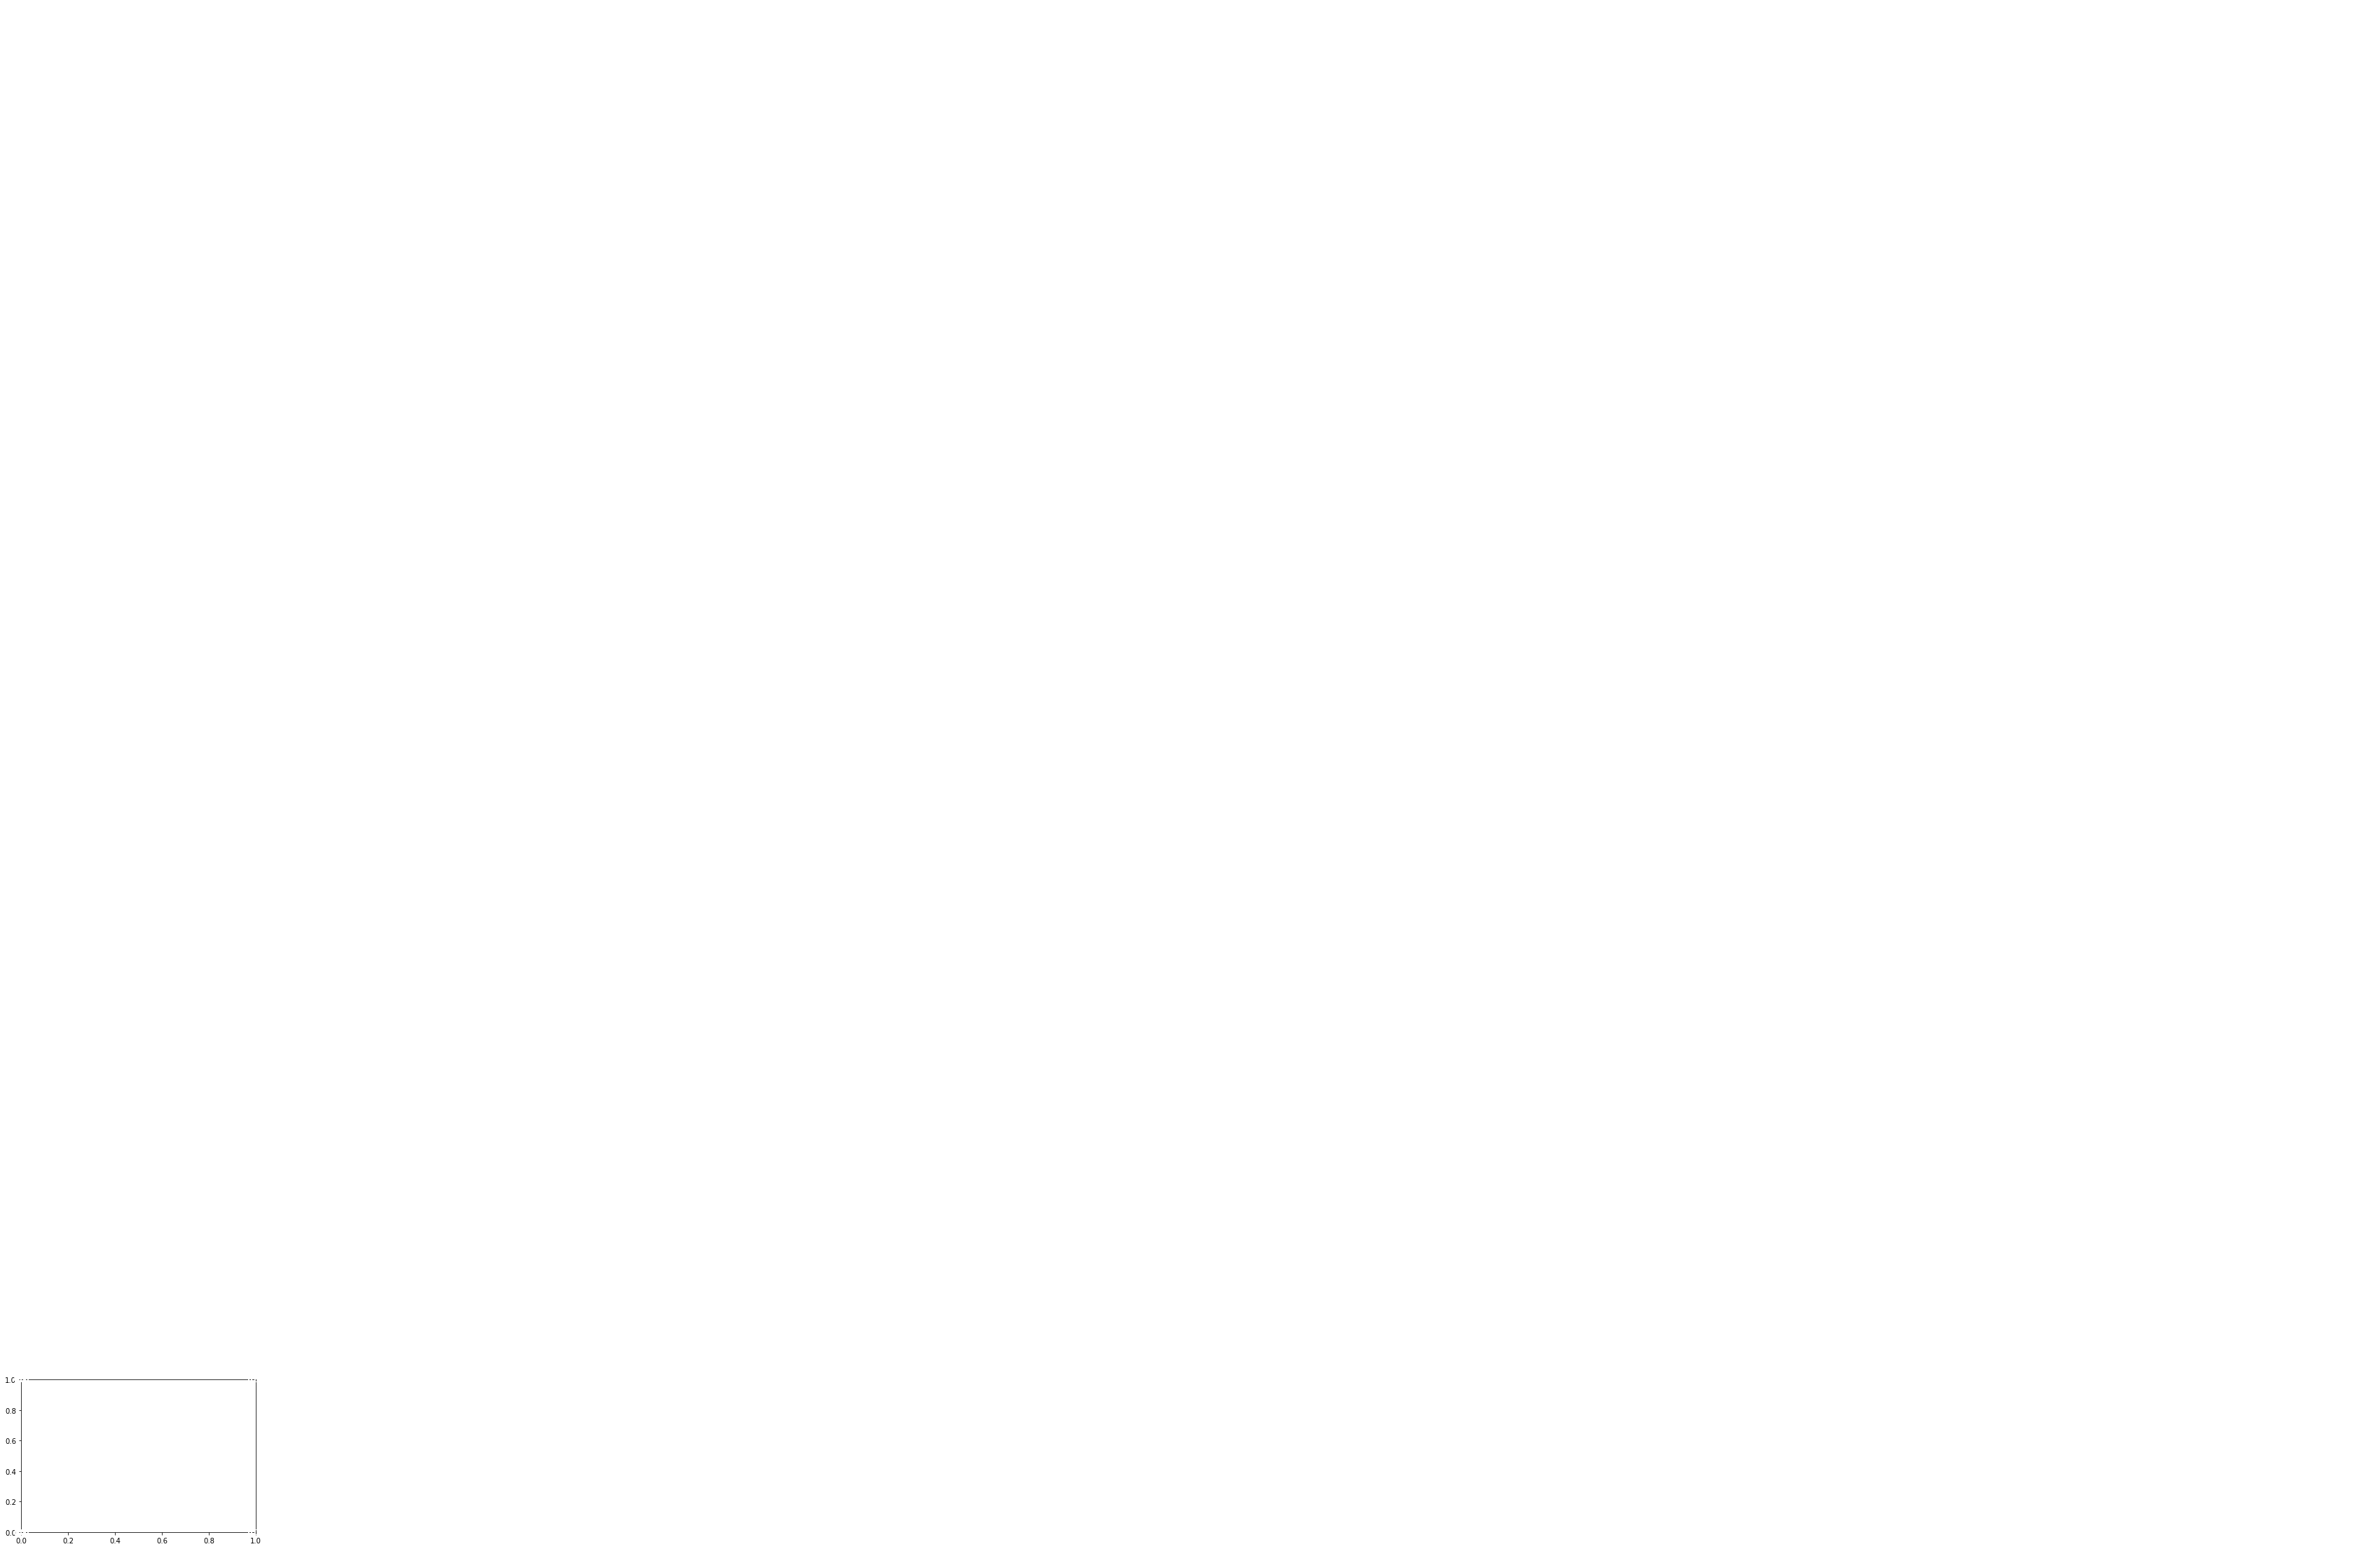

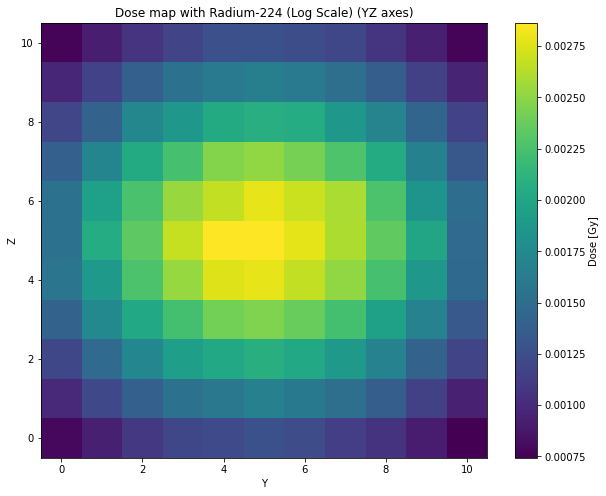

Total Dose Deposited on the Y-axis:
Y: 0, Total Dose: 0.01
Y: 1, Total Dose: 0.01
Y: 2, Total Dose: 0.02
Y: 3, Total Dose: 0.02
Y: 4, Total Dose: 0.02
Y: 5, Total Dose: 0.03
Y: 6, Total Dose: 0.02
Y: 7, Total Dose: 0.02
Y: 8, Total Dose: 0.02
Y: 9, Total Dose: 0.01
Y: 10, Total Dose: 0.01

Total Dose Deposited on the Z-axis:
Z: 0, Total Dose: 0.01
Z: 1, Total Dose: 0.02
Z: 2, Total Dose: 0.02
Z: 3, Total Dose: 0.02
Z: 4, Total Dose: 0.02
Z: 5, Total Dose: 0.02
Z: 6, Total Dose: 0.02
Z: 7, Total Dose: 0.02
Z: 8, Total Dose: 0.02
Z: 9, Total Dose: 0.02
Z: 10, Total Dose: 0.01


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the dose file into a pandas DataFrame
df = pd.read_csv('Dose_radium31.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array = df.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates
y, z = np.meshgrid(df['iY'].unique(), df['iZ'].unique(), indexing='ij')

# Plot the dose map on YZ axes
plt.figure(figsize=(10, 8))
plt.pcolormesh(y, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the YZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Dose Map (YZ axes)')
plt.show()

# Show the exact values of the total dose on the map
for i in range(len(df)):
    y_val = df.loc[i, 'iY']
    z_val = df.loc[i, 'iZ']
    dose_val = df.loc[i, 'Dose [Gy]']
    plt.text(y_val, z_val, f'{dose_val:.2f}', ha='center', va='center', color='white')

plt.figure(figsize=(10, 8))
plt.pcolormesh(y, z, dose_array.T, shading='auto')  # Transpose the dose_array to match the YZ orientation
plt.colorbar(label='Dose [Gy]')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Dose map with Radium-224 (Log Scale) (YZ axes)')
plt.show()

# Compute the total dose deposited at the Y and Z axes
total_dose_y_axis = np.sum(dose_array, axis=1)
total_dose_z_axis = np.sum(dose_array, axis=0)

y_axis_value = np.unique(df['iY'].values)
z_axis_value = np.unique(df['iZ'].values)

print("Total Dose Deposited on the Y-axis:")
for y, dose in zip(y_axis_value, total_dose_y_axis):
    print(f"Y: {y}, Total Dose: {dose:.2f}")

print("\nTotal Dose Deposited on the Z-axis:")
for z, dose in zip(z_axis_value, total_dose_z_axis):
    print(f"Z: {z}, Total Dose: {dose:.2f}")


Dose deposited at each column for the first dose distribution:
Column 0: 0.07 Gy
Column 1: 0.07 Gy
Column 2: 0.07 Gy
Column 3: 0.08 Gy
Column 4: 0.08 Gy
Column 5: 0.08 Gy
Column 6: 0.08 Gy
Column 7: 0.08 Gy
Column 8: 0.07 Gy
Column 9: 0.07 Gy
Column 10: 0.07 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy
Column 10: 0.00 Gy


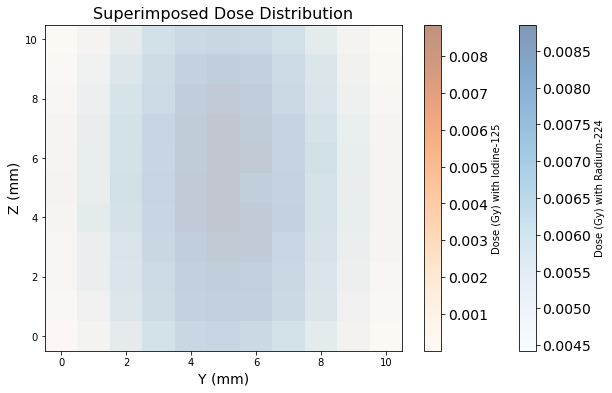

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the first dose file into a pandas DataFrame
df1 = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array1 = df1.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the first dose distribution
y1, z1 = np.meshgrid(df1['iY'].unique(), df1['iZ'].unique(), indexing='ij')

# Read the second dose file into a pandas DataFrame
df2 = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array2 = df2.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the second dose distribution
y2, z2 = np.meshgrid(df2['iY'].unique(), df2['iZ'].unique(), indexing='ij')

# Determine the common maximum dose value for consistent scaling
max_dose = max(np.max(dose_array1), np.max(dose_array2))

# Plot the first dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Y (mm)', fontsize=14)  # Set the Y-axis label
ax.set_ylabel('Z (mm)', fontsize=14)  # Set the Z-axis label
ax.set_title('Superimposed Dose Distribution', fontsize=16)

im1 = ax.pcolormesh(y1, z1, dose_array1, cmap='Blues', alpha=0.5, vmax=max_dose)
im2 = ax.pcolormesh(y2, z2, dose_array2, cmap='Oranges', alpha=0.5, vmax=max_dose)

# Add colorbars for both dose distributions
cbar1 = fig.colorbar(im1, ax=ax, label='Dose (Gy) with Radium-224')
cbar1.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

cbar2 = fig.colorbar(im2, ax=ax, label='Dose (Gy) with Iodine-125')
cbar2.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

# Calculate the total dose for each distribution
total_dose1 = np.sum(dose_array1, axis=0)
total_dose2 = np.sum(dose_array2, axis=0)

# Print the dose deposited at each column for the first dose distribution
print("Dose deposited at each column for the first dose distribution:")
for z, dose in zip(df1['iZ'].unique(), total_dose1):
    print(f"Column {z}: {dose:.2f} Gy")
for y, dose in zip(df2['iZ'].unique(), total_dose2):
    print(f"Column {z}: {dose:.2f} Gy")


# Print the dose deposited at each column for the second dose distribution
#print("\nDose deposited at each column for the second dose distribution


Dose deposited at each column for the first dose distribution:
Column 0: 0.07 Gy
Column 1: 0.07 Gy
Column 2: 0.07 Gy
Column 3: 0.08 Gy
Column 4: 0.08 Gy
Column 5: 0.08 Gy
Column 6: 0.08 Gy
Column 7: 0.08 Gy
Column 8: 0.07 Gy
Column 9: 0.07 Gy
Column 10: 0.07 Gy


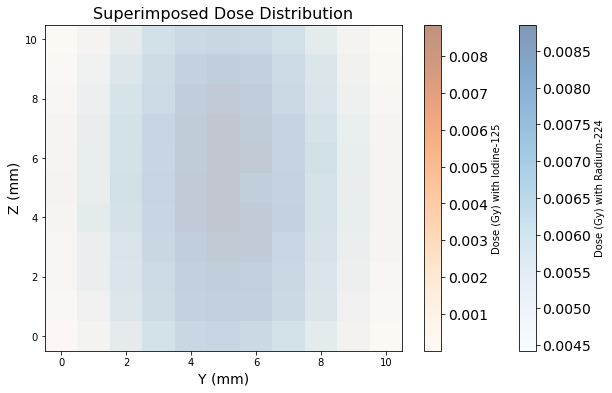

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the first dose file into a pandas DataFrame
df1 = pd.read_csv('Dose_radium3111.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array1 = df1.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the first dose distribution
y1, z1 = np.meshgrid(df1['iY'].unique(), df1['iZ'].unique(), indexing='ij')

# Read the second dose file into a pandas DataFrame
df2 = pd.read_csv('Dose_iodine.txt', comment='#', header=None, names=['iX', 'iY', 'iZ', 'Dose [Gy]', 'Total(val^2)', 'Entry'])

# Convert the DataFrame to a 2D NumPy array
dose_array2 = df2.pivot_table(values='Dose [Gy]', index='iY', columns='iZ', aggfunc='first').values

# Create a meshgrid for the Y and Z coordinates of the second dose distribution
y2, z2 = np.meshgrid(df2['iY'].unique(), df2['iZ'].unique(), indexing='ij')

# Determine the common maximum dose value for consistent scaling
max_dose = max(np.max(dose_array1), np.max(dose_array2))

# Plot the first dose distribution using a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Y (mm)', fontsize=14)  # Set the Y-axis label
ax.set_ylabel('Z (mm)', fontsize=14)  # Set the Z-axis label
ax.set_title('Superimposed Dose Distribution', fontsize=16)

im1 = ax.pcolormesh(y1, z1, dose_array1, cmap='Blues', alpha=0.5, vmax=max_dose)
im2 = ax.pcolormesh(y2, z2, dose_array2, cmap='Oranges', alpha=0.5, vmax=max_dose)

# Add colorbars for both dose distributions
cbar1 = fig.colorbar(im1, ax=ax, label='Dose (Gy) with Radium-224')
cbar1.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

cbar2 = fig.colorbar(im2, ax=ax, label='Dose (Gy) with Iodine-125')
cbar2.ax.tick_params(labelsize=14)  # Manually set the font size for the colorbar

# Calculate the total dose for each distribution
total_dose1 = np.sum(dose_array1, axis=0)
total_dose2 = np.sum(dose_array2, axis=0)

# Calculate the sum of dose deposited on the Z-axis
total_dose_sum = total_dose1 + total_dose2


# Print the dose deposited at each column for the first dose distribution
print("Dose deposited at each column for the first dose distribution:")
for z, dose in zip(df1['iZ'].unique(), total_dose_sum):
    print(f"Column {z}: {dose:.2f} Gy")

